In [1]:
import os, json, re
import pandas as pd
from pandas import json_normalize

In [2]:
INPUT_DIR = "/kaggle/input/data-collector-inspire/inspire_jobs/"

In [3]:
if not os.path.isdir(INPUT_DIR):
    raise FileNotFoundError(f"{INPUT_DIR} not found. Run your download cell first.")

# Support both plain and gzipped JSONL
file_re = re.compile(r"jobs_(\d{4})\.jsonl(\.gz)?$")

records = []
files = [fn for fn in os.listdir(INPUT_DIR) if file_re.match(fn)]
if not files:
    raise FileNotFoundError("No files like jobs_YYYY.jsonl found in the input folder.")

for fn in sorted(files):
    m = file_re.match(fn)
    year = int(m.group(1))
    path = os.path.join(INPUT_DIR, fn)

    # choose opener based on extension
    opener = gzip.open if fn.endswith(".gz") else open
    mode = "rt" if fn.endswith(".gz") else "r"

    with opener(path, mode, encoding="utf-8") as f:
        for i, line in enumerate(f, 1):
            line = line.strip()
            if not line:
                continue
            hit = json.loads(line)
            meta = hit.get("metadata", {}) or {}
            # Carry top-level lineage + explicit year
            meta["_id"] = hit.get("id")
            meta["_created"] = hit.get("created")
            meta["_updated"] = hit.get("updated")
            meta["year"] = year
            records.append(meta)

# Flatten nested dicts (arrays remain as lists, which is fine for EDA)
df = json_normalize(records, sep=".")

print(f"Loaded {len(files)} files, {len(df):,} rows, {df.shape[1]} columns")
display(df.head(3))

# remove 2015 anomaly !!!!!!!!!!!!!!!!!!!!
df = df[df["deadline_date"]!="2015-10-20"]

Loaded 20 files, 29,394 rows, 20 columns


,regions,external_job_identifier,legacy_creation_date,description,external_system_identifiers,institutions,arxiv_categories,urls,deadline_date,ranks,control_number,position,status,_id,_created,_updated,year,accelerator_experiments,legacy_version,deleted_records
0,[North America],120,2006-12-29,TRIUMF is Canada's national research facility ...,"[{'schema': 'SPIRES', 'value': 'JOBS-33901'}]","[{'curated_relation': True, 'record': {'$ref':...",[cs],[{'value': 'http://admin.triumf.ca/d2w-pub/job...,2006-12-29,[STAFF],956975,Senior Linux Systems Administrator,closed,956975,2006-12-29T00:00:00+00:00,2023-01-10T16:15:28.115049+00:00,2006,NaN,NaN,NaN
1,[North America],NaN,2006-12-29,"Pending budgetary approval, the Departments of...","[{'schema': 'SPIRES', 'value': 'JOBS-33910'}]","[{'curated_relation': True, 'record': {'$ref':...",[astro-ph],[{'value': 'http://academicemployment.chance.b...,2006-12-29,[OTHER],956976,Planetary science,closed,956976,2006-12-29T00:00:00+00:00,2023-01-10T16:15:44.574796+00:00,2006,NaN,NaN,NaN
2,[North America],NaN,2006-12-29,The University of California at Berkeley and t...,"[{'schema': 'SPIRES', 'value': 'JOBS-33928'}]","[{'curated_relation': True, 'record': {'$ref':...","[astro-ph, gr-qc, hep-th, hep-ph]",[{'value': 'http://academicemployment.chance.b...,2006-12-29,[POSTDOC],956977,Cosmology theory and observation,closed,956977,2006-12-29T00:00:00+00:00,2023-01-10T16:15:29.788438+00:00,2006,NaN,NaN,NaN


In [4]:
for year in range(2006,2025+1):
    print("\nYEAR:",year, "="*30,">")
    display(df[df.year==year].head(10))


YEAR: 2006 ============================== >


,regions,external_job_identifier,legacy_creation_date,description,external_system_identifiers,institutions,arxiv_categories,urls,deadline_date,ranks,control_number,position,status,_id,_created,_updated,year,accelerator_experiments,legacy_version,deleted_records
0,[North America],120,2006-12-29,TRIUMF is Canada's national research facility ...,"[{'schema': 'SPIRES', 'value': 'JOBS-33901'}]","[{'curated_relation': True, 'record': {'$ref':...",[cs],[{'value': 'http://admin.triumf.ca/d2w-pub/job...,2006-12-29,[STAFF],956975,Senior Linux Systems Administrator,closed,956975,2006-12-29T00:00:00+00:00,2023-01-10T16:15:28.115049+00:00,2006,NaN,NaN,NaN
1,[North America],NaN,2006-12-29,"Pending budgetary approval, the Departments of...","[{'schema': 'SPIRES', 'value': 'JOBS-33910'}]","[{'curated_relation': True, 'record': {'$ref':...",[astro-ph],[{'value': 'http://academicemployment.chance.b...,2006-12-29,[OTHER],956976,Planetary science,closed,956976,2006-12-29T00:00:00+00:00,2023-01-10T16:15:44.574796+00:00,2006,NaN,NaN,NaN
2,[North America],NaN,2006-12-29,The University of California at Berkeley and t...,"[{'schema': 'SPIRES', 'value': 'JOBS-33928'}]","[{'curated_relation': True, 'record': {'$ref':...","[astro-ph, gr-qc, hep-th, hep-ph]",[{'value': 'http://academicemployment.chance.b...,2006-12-29,[POSTDOC],956977,Cosmology theory and observation,closed,956977,2006-12-29T00:00:00+00:00,2023-01-10T16:15:29.788438+00:00,2006,NaN,NaN,NaN
3,[North America],NaN,2006-12-29,"Areas of Research: Experimental Astrophysics, ...","[{'schema': 'SPIRES', 'value': 'JOBS-33936'}]","[{'curated_relation': True, 'record': {'$ref':...","[astro-ph, gr-qc, hep-ph, hep-th]",[{'value': 'http://www.aa.ucsb.edu/jobbulletin...,2006-12-29,[POSTDOC],956978,Temporary research positions,closed,956978,2006-12-29T00:00:00+00:00,2023-01-10T16:15:45.673533+00:00,2006,NaN,NaN,NaN
4,[North America],55199,2006-12-29,The Department of Physics is seeking an Inform...,"[{'schema': 'SPIRES', 'value': 'JOBS-33944'}]","[{'curated_relation': True, 'record': {'$ref':...",[cs],[{'value': 'http://www.ohr.wisc.edu/pvl/pv_055...,2006-12-29,[STAFF],956979,Computing for physics research and teaching,closed,956979,2006-12-29T00:00:00+00:00,2023-01-10T16:15:29.057033+00:00,2006,NaN,NaN,NaN
5,[North America],55112,2006-12-29,The Department of Physics is seeking a person ...,"[{'schema': 'SPIRES', 'value': 'JOBS-33952'}]","[{'curated_relation': True, 'record': {'$ref':...",[cs],[{'value': 'http://www.ohr.wisc.edu/pvl/pv_055...,2006-12-29,[STAFF],956980,Computing support for faculty and students,closed,956980,2006-12-29T00:00:00+00:00,2023-01-10T16:15:42.258543+00:00,2006,NaN,NaN,NaN
6,[Europe],34010-116,2006-12-29,You will have an established international rep...,"[{'schema': 'SPIRES', 'value': 'JOBS-33960'}]","[{'curated_relation': True, 'record': {'$ref':...",[math],[{'value': 'http://secure.admin.warwick.ac.uk/...,2006-12-29,[OTHER],956981,Professor in Applied Mathematics,closed,956981,2006-12-29T00:00:00+00:00,2023-01-10T16:15:28.420732+00:00,2006,NaN,NaN,NaN
7,[Europe],AA06373,2006-12-29,This Readership post is the next stage in our ...,"[{'schema': 'SPIRES', 'value': 'JOBS-33979'}]","[{'curated_relation': True, 'record': {'$ref':...",[physics],[{'value': 'http://www.york.ac.uk/univ/mis/cfm...,2006-12-29,[OTHER],956982,Readership in Experimental Tokamak Plasma Physics,closed,956982,2006-12-29T00:00:00+00:00,2023-01-10T16:15:42.714042+00:00,2006,NaN,NaN,NaN
8,[North America],NaN,2006-12-28,The ATLAS group in the physics department at t...,"[{'schema': 'SPIRES', 'value': 'JOBS-33898'}]","[{'curated_relation': True, 'record': {'$ref':...",[hep-ex],NaN,2006-12-28,[PHD],956974,PhD Studentship on ATLAS,closed,956974,2006-12-28T00:00:00+00:00,2023-01-10T16:15:44.102415+00:00,2006,NaN,NaN,NaN
9,[North America],NaN,2006-12-27,Skidmore College invites applications for a sa...,"[{'schema': 'SPIRES', 'value': 'JOBS-33839'}]","[{'curated_relation': True, 'record': {'$ref':...",[physics],[{'value':


YEAR: 2007 ============================== >


,regions,external_job_identifier,legacy_creation_date,description,external_system_identifiers,institutions,arxiv_categories,urls,deadline_date,ranks,control_number,position,status,_id,_created,_updated,year,accelerator_experiments,legacy_version,deleted_records
1214,[Asia],NaN,2007-12-31,The Centre for theoretical physics is newly es...,"[{'schema': 'SPIRES', 'value': 'JOBS-45012'}]","[{'curated_relation': True, 'record': {'$ref':...","[gr-qc, hep-th]",NaN,2007-12-31,[OTHER],958074,Cosmology and high energy physics,closed,958074,2007-12-31T00:00:00+00:00,2023-01-10T16:15:19.906410+00:00,2007,NaN,NaN,NaN
1215,[Middle East],NaN,2007-12-31,The department of Mathematics &amp; Physics in...,"[{'schema': 'SPIRES', 'value': 'JOBS-45020'}]","[{'curated_relation': True, 'record': {'$ref':...","[gr-qc, hep-lat, hep-ph, hep-th, physics]",[{'value': 'http://mathphys.haifa.ac.il'}],2007-12-31,[OTHER],958075,Theoretical physics,closed,958075,2007-12-31T00:00:00+00:00,2023-01-10T16:15:10.574824+00:00,2007,NaN,NaN,NaN
1216,[North America],NaN,2007-12-27,The experimental high energy physics group at ...,"[{'schema': 'SPIRES', 'value': 'JOBS-44997'}]","[{'curated_relation': True, 'record': {'$ref':...",[hep-ex],[{'value': 'http://www.physics.ohio-state.edu/...,2007-12-27,[POSTDOC],958072,ATLAS program at CERN,closed,958072,2007-12-27T00:00:00+00:00,2023-01-10T16:15:21.632136+00:00,2007,NaN,NaN,NaN
1217,[North America],NaN,2007-12-27,The High-Energy Physics Group at Colorado Stat...,"[{'schema': 'SPIRES', 'value': 'JOBS-45004'}]","[{'curated_relation': True, 'record': {'$ref':...",[hep-ex],[{'value': 'https://www.natsci.colostate.edu/s...,2007-12-27,[POSTDOC],958073,Experimental High-Energy Physics,closed,958073,2007-12-27T00:00:00+00:00,2023-01-10T16:15:32.462699+00:00,2007,NaN,NaN,NaN
1218,[North America],NaN,2007-12-21,<strong>Postdoctoral Position In Elementary Pa...,"[{'schema': 'SPIRES', 'value': 'JOBS-44946'}]","[{'curated_relation': True, 'record': {'$ref':...",[hep-ex],[{'value': 'http://www.utdallas.edu/facultyjob...,2007-12-21,[POSTDOC],958067,Elementary Particle Physics,closed,958067,2007-12-21T00:00:00+00:00,2023-01-10T16:15:10.266409+00:00,2007,NaN,NaN,NaN
1219,[Europe],NaN,2007-12-21,High Energy and Differential Geometry Group Un...,"[{'schema': 'SPIRES', 'value': 'JOBS-44954'}]","[{'curated_relation': True, 'record': {'$ref':...","[hep-ph, hep-th, math]",NaN,2007-12-21,[POSTDOC],958068,High Energy and Differential Geometry Group Po...,closed,958068,2007-12-21T00:00:00+00:00,2023-01-10T16:15:23.666059+00:00,2007,NaN,NaN,NaN
1220,[North America],NaN,2007-12-21,Applied research in diffraction in non uniform...,"[{'schema': 'SPIRES', 'value': 'JOBS-44970'}]","[{'curated_relation': False, 'value': 'M.I.,LL...",[physics],NaN,2007-12-21,[OTHER],958070,Scientist/Physicist,closed,958070,2007-12-21T00:00:00+00:00,2023-01-10T16:15:23.705023+00:00,2007,NaN,NaN,NaN
1221,[Europe],NaN,2007-12-20,"The Cosmology, Particle Astrophysics and Strin...","[{'schema': 'SPIRES', 'value': 'JOBS-44849'}]","[{'curated_relation': True, 'record': {'$ref':...","[astro-ph, hep-ph]",[{'value': 'http://www.physto.se/~ariel/HEAC_p...,2007-12-20,[POSTDOC],958057,"Cosmology, Particle Astrophysics and String Th...",closed,958057,2007-12-20T00:00:00+00:00,2023-01-10T16:15:10.965314+00:00,2007,NaN,NaN,NaN
1222,[North America],NaN,2007-12-20,The Intermediate Energy Nuclear Physics Group ...,"[{'schema': 'SPIRES', 'value': 'JOBS-44857'}]","[{'curated_relation': True, 'record': {'$ref':...","[hep-ex, nucl-ex]",[{'value': 'http://www.npl.uiuc.edu/'}],2007-12-20,[POSTDOC],958058,Intermediate Energy Nuclear Physics Group Rese...,closed,958058,2007-12-20T00:00:00+00:00,2023-01-10T16:15:23.376773+00:00,2007,NaN,NaN,NaN
1223,[North America],NaN,2007-12-20,Postdoctoral Position in Theoretical Nuclear P...,"[{'schema': 'SPIRES', 'value': 'JOBS-44903'}]","[{'curated_relation': True, 'record': {'$ref':...",[nucl-th],NaN,2007-12-20,[POSTDOC],958063,Postdoctoral position in nuclear t


YEAR: 2008 ============================== >


,regions,external_job_identifier,legacy_creation_date,description,external_system_identifiers,institutions,arxiv_categories,urls,deadline_date,ranks,control_number,position,status,_id,_created,_updated,year,accelerator_experiments,legacy_version,deleted_records
2153,[Asia],NaN,2008-12-30,S.N.BOSE NATIONAL CENTRE FOR BASIC SCIENCES<br...,"[{'schema': 'SPIRES', 'value': 'JOBS-58416'}]","[{'curated_relation': True, 'record': {'$ref':...","[gr-qc, hep-th, math-ph, math]",[{'value': 'http://bose.res.in/notices/advertR...,2008-12-30,[POSTDOC],959396,Symmetries of non-Abelian Two-Form Gauge Theories,closed,959396,2008-12-30T00:00:00+00:00,2023-01-10T16:15:26.285639+00:00,2008,NaN,NaN,NaN
2154,[North America],NaN,2008-12-22,"<p> Texas A&amp;M University, Physics Dep...","[{'schema': 'SPIRES', 'value': 'JOBS-58343'}]","[{'curated_relation': True, 'record': {'$ref':...",[hep-ex],[{'value': 'http://faculty.physics.tamu.edu/to...,2008-12-22,[OTHER],959389,Experimental Particle Physics,closed,959389,2008-12-22T00:00:00+00:00,2023-01-10T16:15:29.666808+00:00,2008,NaN,NaN,NaN
2155,[Europe],NaN,2008-12-22,The Centre de Physique des Particules de Marse...,"[{'schema': 'SPIRES', 'value': 'JOBS-58351'}]","[{'curated_relation': True, 'record': {'$ref':...",[hep-ex],[{'value': 'http://marwww.in2p3.fr/spip.php?ar...,2008-12-22,[PHD],959390,PhD position on the LHCb experiment,closed,959390,2008-12-22T00:00:00+00:00,2023-01-10T16:15:44.350394+00:00,2008,NaN,NaN,NaN
2156,[North America],NaN,2008-12-18,Physics Department<br> University of Californi...,"[{'schema': 'SPIRES', 'value': 'JOBS-58270'}]","[{'curated_relation': True, 'record': {'$ref':...",[hep-ph],NaN,2008-12-18,[OTHER],959382,Theoretical high energy physics,closed,959382,2008-12-18T00:00:00+00:00,2023-01-10T16:15:42.536357+00:00,2008,NaN,NaN,NaN
2157,[South America],NaN,2008-12-17,The Centro de Estudios Cient&iacute;ficos invi...,"[{'schema': 'SPIRES', 'value': 'JOBS-58246'}]","[{'curated_relation': True, 'record': {'$ref':...","[gr-qc, hep-th]",[{'value': 'http://www.cecs.cl'}],2008-12-17,[POSTDOC],959379,Theoretical physics,closed,959379,2008-12-17T00:00:00+00:00,2023-01-10T16:15:29.396730+00:00,2008,NaN,NaN,NaN
2158,[South America],NaN,2008-12-17,We invite applications for a postdoctoral posi...,"[{'schema': 'SPIRES', 'value': 'JOBS-58254'}]","[{'curated_relation': True, 'record': {'$ref':...",[hep-th],NaN,2008-12-17,[POSTDOC],959380,String Theory: AdS/CFT correspondence,closed,959380,2008-12-17T00:00:00+00:00,2023-01-10T16:15:43.381284+00:00,2008,NaN,NaN,NaN
2159,[North America],6145,2008-12-11,Job number: MIT-00006145 <p> The Laboratory fo...,"[{'schema': 'SPIRES', 'value': 'JOBS-58190'}]","[{'curated_relation': True, 'record': {'$ref':...",[nucl-ex],[{'value': 'http://www2.lns.mit.edu/jobs/post-...,2008-12-11,[POSTDOC],959374,Nuclear Interactions Group,closed,959374,2008-12-11T00:00:00+00:00,2023-01-10T16:15:45.287132+00:00,2008,NaN,NaN,NaN
2160,[North America],214120,2008-12-10,Summary: Postdoctoral Position in Neutron Scat...,"[{'schema': 'SPIRES', 'value': 'JOBS-58157'}]","[{'curated_relation': True, 'record': {'$ref':...",[nucl-ex],[{'value': 'https://www.hr.lanl.gov/JobListing...,2008-12-10,[POSTDOC],959370,Neutron Scattering and Spallation Physics,closed,959370,2008-12-10T00:00:00+00:00,2023-01-10T16:15:43.718515+00:00,2008,NaN,NaN,NaN
2161,[North America],22449,2008-12-10,Lawrence Berkeley National Laboratory (LBNL) i...,"[{'schema': 'SPIRES', 'value': 'JOBS-58122'}]","[{'curated_relation': True, 'record': {'$ref':...","[hep-ex, nucl-ex, astro-ph]",[{'value': 'http://jobs.lbl.gov/LBNLCareers/de...,2008-12-10,[POSTDOC],959367,Neutrino Astrophysics,closed,959367,2008-12-10T00:00:00+00:00,2023-01-10T16:15:33.009096+00:00,2008,NaN,NaN,NaN
2162,[Europe],NaN,2008-12-08,The Heidelberg ASIC Laboratory located in the ...,"[{'schema': 'SPIRES', 'value': 'JOBS-58050'}]","[{'curated_relation': True, 'record': {'$ref':...","[hep-ex, physics.ins-det]",[{'value': 'http://tinyurl.com/63pqxr'}]


YEAR: 2009 ============================== >


,regions,external_job_identifier,legacy_creation_date,description,external_system_identifiers,institutions,arxiv_categories,urls,deadline_date,ranks,control_number,position,status,_id,_created,_updated,year,accelerator_experiments,legacy_version,deleted_records
2776,[North America],NaN,2009-12-21,Postdoctoral Research Position Experimental Ne...,"[{'schema': 'SPIRES', 'value': 'JOBS-70483'}]","[{'curated_relation': True, 'record': {'$ref':...",[hep-ex],NaN,2009-12-21,[POSTDOC],960579,Postdoctoral Researcher,closed,960579,2009-12-21T00:00:00+00:00,2023-01-10T16:15:18.294293+00:00,2009,NaN,NaN,NaN
2777,[Europe],NaN,2009-12-15,"<b>University of Groningen, the Netherlands, F...","[{'schema': 'SPIRES', 'value': 'JOBS-70270'}]","[{'curated_relation': True, 'record': {'$ref':...","[astro-ph, gr-qc, hep-ph, hep-th]",[{'value': 'http://www.rug.nl/fwn/vacatures/st...,2009-12-15,[OTHER],960558,tenure track assistant professor in Theoretica...,closed,960558,2009-12-15T00:00:00+00:00,2023-01-10T16:15:31.056875+00:00,2009,NaN,NaN,NaN
2778,[North America],NaN,2009-12-15,A postdoctoral position in Experimental Nuclea...,"[{'schema': 'SPIRES', 'value': 'JOBS-70319'}]","[{'curated_relation': True, 'record': {'$ref':...","[hep-ex, nucl-ex]",[{'value': 'http://www.hr.lanl.gov/JobListing/...,2009-12-15,[POSTDOC],960562,Postdoc position in experimental nuclear/parti...,closed,960562,2009-12-15T00:00:00+00:00,2023-01-10T16:15:29.674777+00:00,2009,NaN,NaN,NaN
2779,[North America],NaN,2009-12-14,The Indiana University High Energy group seeks...,"[{'schema': 'SPIRES', 'value': 'JOBS-70238'}]","[{'curated_relation': True, 'record': {'$ref':...",[hep-ex],[{'value': 'http://pauline.web.cern.ch/pauline...,2009-12-14,[POSTDOC],960554,ATLAS Postdoc at Indiana University,closed,960554,2009-12-14T00:00:00+00:00,2023-01-10T16:15:30.827523+00:00,2009,NaN,NaN,NaN
2780,[Europe],NaN,2009-12-11,Applications are invited for a postdoctoral po...,"[{'schema': 'SPIRES', 'value': 'JOBS-70165'}]","[{'curated_relation': True, 'record': {'$ref':...","[hep-th, cond-mat]",NaN,2009-12-11,[POSTDOC],960547,"AdS/CFT correspondence, quantum statistical as...",closed,960547,2009-12-11T00:00:00+00:00,2023-01-10T16:15:17.112470+00:00,2009,NaN,NaN,NaN
2781,[Europe],NaN,2009-12-10,The Theoretical Physics group of the Aristotle...,"[{'schema': 'SPIRES', 'value': 'JOBS-70092'}]","[{'curated_relation': True, 'record': {'$ref':...",[hep-ph],NaN,2009-12-10,[PHD],960540,ITN program: Unification at the LHC era,closed,960540,2009-12-10T00:00:00+00:00,2023-01-10T16:15:30.303520+00:00,2009,NaN,NaN,NaN
2782,[Europe],NaN,2009-12-09,"<p></p><p> For further information, and to app...","[{'schema': 'SPIRES', 'value': 'JOBS-70033'}]","[{'curated_relation': False, 'value': '*** CNR...",[hep-ex],[{'value': 'http://atlas.web.cern.ch/Atlas/GRO...,2009-12-09,[OTHER],960534,CNRS: Permanent positions,closed,960534,2009-12-09T00:00:00+00:00,2023-01-10T16:15:28.768479+00:00,2009,NaN,NaN,NaN
2783,[South America],NaN,2009-12-09,"<p></p><p> For further information, and to app...","[{'schema': 'SPIRES', 'value': 'JOBS-70041'}]","[{'curated_relation': True, 'record': {'$ref':...",[hep-ex],[{'value': 'http://atlas.web.cern.ch/Atlas/GRO...,2009-12-09,[POSTDOC],960535,ATLAS Experiment,closed,960535,2009-12-09T00:00:00+00:00,2023-01-10T16:15:16.837109+00:00,2009,NaN,NaN,NaN
2784,[North America],315551,2009-12-09,The candidate will perform research with Dr. J...,"[{'schema': 'SPIRES', 'value': 'JOBS-69990'}]","[{'curated_relation': True, 'record': {'$ref':...",[hep-ex],[{'value': 'http://www.anl.gov/jobsearch/detai...,2009-12-09,[POSTDOC],960530,ATLAS at the LHC,closed,960530,2009-12-09T00:00:00+00:00,2023-01-10T16:15:30.114408+00:00,2009,NaN,NaN,NaN
2785,[North America],314901,2009-12-09,"Responsible for the development of a coherent,...","[{'schema': 'SPIRES', 'value': 'JOBS-70009'}]","[{'curated_relation': True, 'record': {'$ref':...","[physics.ins-det, hep-ex, nucl-ex, astro-ph]",[{'value': 'http://www.anl.gov/jobse


YEAR: 2010 ============================== >


,regions,external_job_identifier,legacy_creation_date,description,external_system_identifiers,institutions,arxiv_categories,urls,deadline_date,ranks,control_number,position,status,_id,_created,_updated,year,accelerator_experiments,legacy_version,deleted_records
3140,[Europe],AJO-636,2010-12-30,The Paris Centre for Cosmological Physics (PCC...,"[{'schema': 'SPIRES', 'value': 'JOBS-86916'}]","[{'curated_relation': True, 'record': {'$ref':...","[astro-ph, gr-qc]",[{'value': 'http://academicjobsonline.org/ajo/...,2010-12-30,[POSTDOC],962203,Paris Centre for Cosmological Physics,closed,962203,2010-12-30T00:00:00+00:00,2023-01-10T16:15:49.925414+00:00,2010,NaN,NaN,NaN
3141,[North America],220638 - 220641,2010-12-22,The Subatomic Physics Group (P-25) at Los Alam...,"[{'schema': 'SPIRES', 'value': 'JOBS-86800'}]","[{'curated_relation': True, 'record': {'$ref':...",[nucl-ex],[{'value': 'http://www.hr.lanl.gov/JobListing/...,2010-12-22,"[SENIOR, JUNIOR]",962192,Experimental Nuclear Physics: Neutron EDM,closed,962192,2010-12-22T00:00:00+00:00,2023-01-10T16:15:34.752464+00:00,2010,NaN,NaN,NaN
3142,[North America],1000974,2010-12-22,Postdoctoral fellowship in Quantum Information...,"[{'schema': 'SPIRES', 'value': 'JOBS-86819'}]","[{'curated_relation': True, 'record': {'$ref':...",[quant-ph],[{'value': 'http://www.princeton.edu/jobs'}],2010-12-22,[POSTDOC],962193,Quantum Information and Computation,closed,962193,2010-12-22T00:00:00+00:00,2023-01-10T16:15:48.834185+00:00,2010,NaN,NaN,NaN
3143,[North America],NaN,2010-12-20,The Ohio State University invites applications...,"[{'schema': 'SPIRES', 'value': 'JOBS-86754'}]","[{'curated_relation': True, 'record': {'$ref':...",[hep-ex],NaN,2010-12-20,[POSTDOC],962187,CMS Experiment,closed,962187,2010-12-20T00:00:00+00:00,2023-01-10T16:15:22.816119+00:00,2010,[{'record': {'$ref': 'https://inspirehep.net/a...,NaN,NaN
3144,[Asia],NaN,2010-12-17,The Department of Physics of The Hong Kong Uni...,"[{'schema': 'SPIRES', 'value': 'JOBS-86681'}]","[{'curated_relation': True, 'record': {'$ref':...",NaN,[{'value': 'http://physics.ust.hk'}],2010-12-17,NaN,962180,Theoretical Physics Faculty positions,closed,962180,2010-12-17T00:00:00+00:00,2023-01-10T16:15:33.502059+00:00,2010,NaN,NaN,NaN
3145,[Europe],NaN,2010-12-17,<p> Experienced Researcher (young postdoc) fel...,"[{'schema': 'SPIRES', 'value': 'JOBS-86703'}]","[{'curated_relation': False, 'value': '*** Sev...","[hep-ex, hep-ph, hep-th]",[{'value': 'http://www.lhcphenonet.eu/jobs'}],2010-12-17,[POSTDOC],962182,Experienced Researcher (young postdoc) fellows...,closed,962182,2010-12-17T00:00:00+00:00,2023-01-10T16:15:35.281036+00:00,2010,NaN,NaN,NaN
3146,[North America],NaN,2010-12-16,We are seeking qualified candidates for post-d...,"[{'schema': 'SPIRES', 'value': 'JOBS-86622'}]","[{'curated_relation': True, 'record': {'$ref':...","[astro-ph, hep-ph, hep-th]",NaN,2010-12-16,[POSTDOC],962174,Post-doctoral Positions in Physical Cosmology,closed,962174,2010-12-16T00:00:00+00:00,2023-01-10T16:15:33.537178+00:00,2010,[{'record': {'$ref': 'https://inspirehep.net/a...,NaN,NaN
3147,[North America],NaN,2010-12-15,The University of Minnesota has an opening for...,"[{'schema': 'SPIRES', 'value': 'JOBS-86584'}]","[{'curated_relation': True, 'record': {'$ref':...",[astro-ph],[{'value': 'https://employment.umn.edu/applica...,2010-12-15,[POSTDOC],962170,Research Associate Experimental High Energy As...,closed,962170,2010-12-15T00:00:00+00:00,2023-01-10T16:15:34.274027+00:00,2010,[{'record': {'$ref': 'https://inspirehep.net/a...,NaN,NaN
3148,[North America],NaN,2010-12-15,The University of Minnesota has an opening for...,"[{'schema': 'SPIRES', 'value': 'JOBS-86592'}]","[{'curated_relation': True, 'record': {'$ref':...",[astro-ph],[{'value': 'https://employment.umn.edu/applica...,2010-12-15,[POSTDOC],962171,Research Associate in Galaxy Formation and Evo...,closed,962171,2010-12-15T00:00:00+00:00,2023-01-10T16:15:50.010263+00:00,2010,NaN,NaN,NaN
3149,[North America],NaN,2010-1


YEAR: 2011 ============================== >


,regions,external_job_identifier,legacy_creation_date,description,external_system_identifiers,institutions,arxiv_categories,urls,deadline_date,ranks,control_number,position,status,_id,_created,_updated,year,accelerator_experiments,legacy_version,deleted_records
3697,[Europe],6045,2011-12-19,"For further information, and to apply, please ...",NaN,"[{'curated_relation': True, 'record': {'$ref':...","[hep-th, hep-ph]",[{'value': 'http://www.swan.ac.uk/personnel/va...,2011-12-22,[POSTDOC],1081946,Theoretical physics,closed,1081946,2011-12-19T00:00:00+00:00,2019-08-09T12:30:27.260858+00:00,2011,NaN,20150312164019.0,NaN
3698,[Europe],072011WF,2011-12-17,"For further information, and to apply, please ...",NaN,"[{'curated_relation': True, 'record': {'$ref':...",[hep-lat],[{'value': 'https://jobs.soton.ac.uk/Vacancy.a...,2011-12-23,[POSTDOC],1081683,Lattice physics,closed,1081683,2011-12-17T00:00:00+00:00,2019-08-09T12:30:37.574561+00:00,2011,NaN,20130212211038.0,NaN
3699,[Europe],NaN,2011-12-16,Respected Sirs: the International PhD Program ...,NaN,"[{'curated_relation': False, 'value': 'Univers...",[cond-mat],NaN,2011-12-21,[PHD],1081440,PhD fellowship,closed,1081440,2011-12-16T00:00:00+00:00,2019-08-09T12:30:29.922150+00:00,2011,NaN,20150901063804.0,NaN
3700,[Europe],AJO-1354,2011-12-16,Responsibilities include research and teaching...,NaN,"[{'curated_relation': True, 'record': {'$ref':...","[hep-th, gr-qc]",[{'value': 'https://academicjobsonline.org/ajo...,2011-12-31,[JUNIOR],1081469,Scientific Coordinator: Riemann Center for Geo...,closed,1081469,2011-12-16T00:00:00+00:00,2019-08-09T12:30:33.733946+00:00,2011,NaN,20130226160347.0,NaN
3701,[North America],AJO-1353,2011-12-15,Applications are invited for a Postdoctoral Re...,NaN,"[{'curated_relation': True, 'record': {'$ref':...",[hep-ph],[{'value': 'https://academicjobsonline.org/ajo...,2011-12-31,[POSTDOC],1081436,Model building and collider physics,closed,1081436,2011-12-15T00:00:00+00:00,2019-08-09T12:30:29.672644+00:00,2011,NaN,20130531174827.0,NaN
3702,[Europe],11267/NL,2011-12-15,"For further information, and to apply, please ...",NaN,"[{'curated_relation': True, 'record': {'$ref':...",[hep-ex],[{'value': 'http://webapps.qmul.ac.uk/hr/vacan...,2011-12-17,[POSTDOC],1081438,ATLAS Experiment,closed,1081438,2011-12-15T00:00:00+00:00,2019-08-09T12:30:29.835111+00:00,2011,"[{'name': 'CERN-LHC-ATLAS', 'record': {'$ref':...",20150312164018.0,NaN
3703,[North America],2011197,2011-12-14,The Nuclear Theory Group at Ohio University an...,NaN,"[{'curated_relation': True, 'record': {'$ref':...",[nucl-th],[{'value': 'https://www.ohiouniversityjobs.com...,2011-12-28,[POSTDOC],1081089,Theoretical Nuclear Physics,closed,1081089,2011-12-14T00:00:00+00:00,2019-08-09T12:30:06.040486+00:00,2011,NaN,20181128175005.0,NaN
3704,[Europe],101605,2011-12-14,"For further information, and to apply, please ...",NaN,"[{'curated_relation': True, 'record': {'$ref':...",[physics.acc-ph],[{'value': 'https://www.recruit.ox.ac.uk'}],2011-12-16,[POSTDOC],1081092,Beam Delivery System Development,closed,1081092,2011-12-14T00:00:00+00:00,2019-08-09T12:30:06.190871+00:00,2011,NaN,20150312164018.0,NaN
3705,[Asia],NaN,2011-12-12,The KEK Theory Center is seeking candidates ...,NaN,"[{'curated_relation': True, 'record': {'$ref':...",[hep-ph],[{'value': 'http://www.kek.jp/intra-e/jobs/doc...,2011-12-28,[POSTDOC],1080838,QCD and Extensive Air Showers,closed,1080838,2011-12-12T00:00:00+00:00,2019-08-09T12:30:20.366611+00:00,2011,NaN,20130207184825.0,NaN
3706,[North America],NaN,2011-12-12,"Loyola University Chicago (LUC), College of Ar...",NaN,"[{'curated_relation': True, 'record': {'$ref':...",[physics],[{'value': 'http://www.careers.luc.edu/applica...,2011-12-20,[JUNIOR],1080849,Instructor of Physics,closed,1080849,2011-12-12T00:00:00+00:00,2019-08-09T12:30:21.425429+00:00,2011,NaN,20150312174616.0,NaN



YEAR: 2012 ============================== >


,regions,external_job_identifier,legacy_creation_date,description,external_system_identifiers,institutions,arxiv_categories,urls,deadline_date,ranks,control_number,position,status,_id,_created,_updated,year,accelerator_experiments,legacy_version,deleted_records
4421,[North America],NaN,2013-08-23,"Faculty Position in Physics Lehman College, C...",NaN,"[{'curated_relation': True, 'record': {'$ref':...","[astro-ph, cond-mat, cs, gr-qc, hep-lat, hep-p...",[{'value': 'http://www.lehman.cuny.edu/academi...,2012-12-01,"[SENIOR, JUNIOR]",1250379,Theoretical and Computational Physics,closed,1250379,2013-08-23T00:00:00+00:00,2019-08-09T12:54:01.360986+00:00,2012,NaN,20190711204125.0,NaN
4422,[North America],NaN,2013-08-09,The experimental heavy-ion physics group at Ri...,NaN,"[{'curated_relation': True, 'record': {'$ref':...","[hep-ex, nucl-ex]",NaN,2012-12-01,[POSTDOC],1246986,Experimental Heavy-Ion Physics - CMS,closed,1246986,2013-08-09T00:00:00+00:00,2019-08-09T12:53:51.302345+00:00,2012,[{'record': {'$ref': 'https://inspirehep.net/a...,20140207204916.0,NaN
4423,[North America],NaN,2013-06-12,The high-energy physics group at McGill Univer...,NaN,"[{'curated_relation': True, 'record': {'$ref':...","[hep-ex, physics.ins-det]",[{'value': 'http://www.hep.physics.mcgill.ca/~...,2012-12-01,[POSTDOC],1238148,Particle Detector Characterization,closed,1238148,2013-06-12T00:00:00+00:00,2019-08-09T12:51:22.240101+00:00,2012,NaN,20140207204916.0,NaN
4424,[North America],384,2013-06-05,&nbsp;<br> <strong>High Power RF Engineer </st...,NaN,"[{'curated_relation': True, 'record': {'$ref':...",NaN,[{'value': 'http://www.triumf.ca/'}],2012-12-01,[STAFF],1237014,High Power RF Engineer,closed,1237014,2013-06-05T00:00:00+00:00,2019-08-09T12:51:27.635220+00:00,2012,NaN,20140207215502.0,NaN
4425,[North America],NaN,2013-05-24,<strong>Duties and Responsibilities</strong><b...,NaN,"[{'curated_relation': True, 'record': {'$ref':...","[astro-ph, hep-ex]",NaN,2012-12-01,[POSTDOC],1235205,AMS-02 Data Analysis,closed,1235205,2013-05-24T00:00:00+00:00,2019-08-09T12:51:18.495441+00:00,2012,[{'record': {'$ref': 'https://inspirehep.net/a...,20140207185805.0,NaN
4426,[Europe],NaN,2013-05-10,"For further information, and to apply, please ...",NaN,"[{'curated_relation': True, 'record': {'$ref':...",[hep-ex],[{'value': 'http://aliceinfo.cern.ch/node/2319...,2012-12-01,[POSTDOC],1232551,Distributed analysis at Padova-Legnaro Tier-2,closed,1232551,2013-05-10T00:00:00+00:00,2019-08-09T12:50:41.487966+00:00,2012,[{'record': {'$ref': 'https://inspirehep.net/a...,20140207180623.0,NaN
4427,[North America],NaN,2013-05-06,The ATLAS group at the University of Alberta h...,NaN,"[{'curated_relation': True, 'record': {'$ref':...",[hep-ex],[{'value': 'http://www.cpp.ualberta.ca'}],2012-12-01,[POSTDOC],1231881,ATLAS Experiment,closed,1231881,2013-05-06T00:00:00+00:00,2019-08-09T12:50:33.271940+00:00,2012,[{'record': {'$ref': 'https://inspirehep.net/a...,20140207185805.0,NaN
4428,[Europe],m/f,2013-03-21,European Spallation Source AB is preparing to ...,NaN,"[{'curated_relation': True, 'record': {'$ref':...","[physics.acc-ph, physics.ins-det]",[{'value': 'http://jobstats.robopost.com/count...,2012-12-01,"[SENIOR, JUNIOR]",1224714,Development Engineer,closed,1224714,2013-03-21T00:00:00+00:00,2019-08-09T12:49:29.205865+00:00,2012,NaN,20150901072259.0,NaN
4429,[Europe],m/f,2013-03-21,European Spallation Source AB is preparing to ...,NaN,"[{'curated_relation': True, 'record': {'$ref':...","[physics.acc-ph, physics.ins-det]",[{'value': 'http://jobstats.robopost.com/count...,2012-12-01,"[SENIOR, JUNIOR, POSTDOC]",1224716,Sr Mechanical Engineer - Neutron Scattering In...,closed,1224716,2013-03-21T00:00:00+00:00,2019-08-09T12:49:29.654666+00:00,2012,NaN,20140207215502.0,NaN
4430,[Europe],NaN,2013-03-19,Development of Pixel Tracking Trigger in the C...,NaN,"[{'curated_relation': True, 'record': {'$ref':...","[hep-ex, physics.ins-det]",[{'value': 'http://www.apc.univ-paris7.fr/APC/...,2012-12-01


YEAR: 2013 ============================== >


,regions,external_job_identifier,legacy_creation_date,description,external_system_identifiers,institutions,arxiv_categories,urls,deadline_date,ranks,control_number,position,status,_id,_created,_updated,year,accelerator_experiments,legacy_version,deleted_records
5524,[North America],AJO-3755,2013-12-19,The high energy theory group at Argonne Nation...,NaN,"[{'curated_relation': False, 'value': 'Argonne...",[hep-ph],[{'value': 'https://academicjobsonline.org/ajo...,2013-12-31,[POSTDOC],1272083,HEP theory,closed,1272083,2013-12-19T00:00:00+00:00,2019-08-09T12:57:35.723723+00:00,2013,NaN,20140315010747.0,NaN
5525,[Australasia],18294,2013-12-09,<p>The Centre for the Subatomic Structure of M...,NaN,"[{'curated_relation': True, 'record': {'$ref':...","[hep-th, nucl-th]",[{'value': 'http://www.adelaide.edu.au/jobs/cu...,2013-12-20,[POSTDOC],1268207,Theoretical nuclear and particle physics,closed,1268207,2013-12-09T00:00:00+00:00,2019-08-09T12:57:28.485733+00:00,2013,NaN,20150901085133.0,NaN
5526,[Asia],ACCL13-4,2013-12-09,Accelerator Laboratory of KEK is responsible f...,NaN,"[{'curated_relation': True, 'record': {'$ref':...",[physics.acc-ph],[{'value': 'http://legacy.kek.jp/intra-e/jobs/...,2013-12-25,[JUNIOR],1268239,Accelerator Physics,closed,1268239,2013-12-09T00:00:00+00:00,2019-08-09T12:57:04.927142+00:00,2013,NaN,20150901085133.0,NaN
5527,[Asia],ACCL13-7,2013-12-09,<p>Accelerator Laboratory of KEK is responsibl...,NaN,"[{'curated_relation': True, 'record': {'$ref':...",[physics.acc-ph],[{'value': 'http://legacy.kek.jp/intra-e/jobs/...,2013-12-28,[POSTDOC],1268240,Accelerator Physics,closed,1268240,2013-12-09T00:00:00+00:00,2019-08-09T12:57:04.973467+00:00,2013,NaN,20150901085133.0,NaN
5528,[Europe],AJO-3670,2013-12-04,<p>The quantum field theory group at the Fried...,NaN,"[{'curated_relation': True, 'record': {'$ref':...","[hep-th, hep-lat, math-ph]",[{'value': 'https://academicjobsonline.org/ajo...,2013-12-18,[POSTDOC],1267268,Theoretical High Energy Physics,closed,1267268,2013-12-04T00:00:00+00:00,2019-08-09T12:57:11.624005+00:00,2013,NaN,20150901085132.0,NaN
5529,[Europe],NaN,2013-12-03,P { margin-bottom: 0.21cm; }A:link { } <p> The...,NaN,"[{'curated_relation': True, 'record': {'$ref':...",[astro-ph],[{'value': 'http://www.uni-wuppertal.de/univer...,2013-12-06,[POSTDOC],1267061,Neutrino physics,closed,1267061,2013-12-03T00:00:00+00:00,2019-08-09T12:57:14.470968+00:00,2013,"[{'name': 'KATRIN', 'record': {'$ref': 'https:...",20150901085132.0,NaN
5530,[Europe],NaN,2013-12-03,P { margin-bottom: 0.21cm; }A:link { } <p> The...,NaN,"[{'curated_relation': True, 'record': {'$ref':...",[astro-ph],[{'value': 'http://www.uni-wuppertal.de/univer...,2013-12-20,[PHD],1267063,Neutrino Physics,closed,1267063,2013-12-03T00:00:00+00:00,2019-08-09T12:57:14.653283+00:00,2013,"[{'name': 'KATRIN', 'record': {'$ref': 'https:...",20150901085132.0,NaN
5531,[North America],16557/6922,2013-12-02,<p> Requires a Ph.D. in nuclear or particle ph...,NaN,"[{'curated_relation': True, 'record': {'$ref':...",[nucl-th],[{'value': 'http://www.bnl.gov/HR/Careers/'}],2013-12-15,[POSTDOC],1265582,Theoretical Nuclear Physics,closed,1265582,2013-12-02T00:00:00+00:00,2019-08-09T12:57:10.083180+00:00,2013,NaN,20140109162207.0,NaN
5532,[Europe],NaN,2013-12-02,&nbsp; The Particle Physics group of the Facu...,NaN,"[{'curated_relation': True, 'record': {'$ref':...",[hep-ph],[{'value': 'http://particle.univie.ac.at'}],2013-12-04,[POSTDOC],1265590,High-energy particle physics phenomenology,closed,1265590,2013-12-02T00:00:00+00:00,2019-08-09T12:56:55.065745+00:00,2013,NaN,20140207204916.0,NaN
5533,[Europe],NaN,2013-12-02,&nbsp; The Particle Physics group of the Facu...,NaN,"[{'curated_relation': True, 'record': {'$ref':...",[hep-ph],[{'value': 'http://particle.univie.ac.at'}],2013-12-04,[POSTDOC],1265591,High-energy particle physics phenomenology,closed,1265591,2013-12-02T00:00:00+00:00,2019-08-09T12:56:55.119785+00:00,2013,NaN,20140315010747.0,NaN



YEAR: 2014 ============================== >


,regions,external_job_identifier,legacy_creation_date,description,external_system_identifiers,institutions,arxiv_categories,urls,deadline_date,ranks,control_number,position,status,_id,_created,_updated,year,accelerator_experiments,legacy_version,deleted_records
6828,[North America],NaN,2016-10-14,<strong>Tenure-track Assistant Professor Level...,NaN,"[{'curated_relation': True, 'record': {'$ref':...","[astro-ph, gr-qc, hep-ph, hep-th]",[{'value': 'http://aprecruit.ucr.edu/apply/JPF...,2014-01-01,[JUNIOR],1492023,Tenure-track Assistant Professor Level Faculty...,closed,1492023,2016-10-14T00:00:00+00:00,2019-08-09T13:34:36.187596+00:00,2014,NaN,20190713212635.0,NaN
6829,[Europe],NaN,2014-12-17,<p> The Department of Physics and Technology (...,NaN,"[{'curated_relation': True, 'record': {'$ref':...",[physics.ins-det],[{'value': 'http://www.jobbnorge.no/ledige-sti...,2014-12-30,[JUNIOR],1334594,Microelectronics,closed,1334594,2014-12-17T00:00:00+00:00,2019-08-09T13:07:38.206721+00:00,2014,NaN,20150112194359.0,NaN
6830,[North America],Y15948,2014-12-17,<p>The Physics Department at the University of...,NaN,"[{'curated_relation': True, 'record': {'$ref':...",[physics],[{'value': 'http://hr.uark.edu/jobdetails.asp?...,2014-12-30,[JUNIOR],1334599,Assistant Professor - Physics,closed,1334599,2014-12-17T00:00:00+00:00,2019-08-09T13:07:40.870159+00:00,2014,NaN,20150512180050.0,NaN
6831,[Europe],4182,2014-12-17,<p>The MCnetITN is a Marie Curie Initial Train...,NaN,"[{'curated_relation': True, 'record': {'$ref':...",[hep-ph],[{'value': 'https://ig5.i-grasp.com/fe/tpl_dur...,2014-12-28,[PHD],1334610,QCD physics at the LHC,closed,1334610,2014-12-17T00:00:00+00:00,2019-08-09T13:07:42.206577+00:00,2014,NaN,20150513181408.0,NaN
6832,[North America],416; AJO-5176,2014-12-17,<p><b>Research Associate-Computational Acceler...,NaN,"[{'curated_relation': True, 'record': {'$ref':...",[physics.acc-ph],[{'value': 'https://academicjobsonline.org/ajo...,2014-12-26,[POSTDOC],1334614,Computational Accelerator Physics,closed,1334614,2014-12-17T00:00:00+00:00,2019-08-09T13:07:42.502173+00:00,2014,NaN,20150113194334.0,NaN
6833,[Europe],SU FV-3493-14,2014-12-15,"<a href=""http://www.fysik.su.se/"">The Departme...",NaN,"[{'curated_relation': True, 'record': {'$ref':...","[gr-qc, hep-th]",[{'value': 'http://www.su.se/english/about/vac...,2014-12-30,[POSTDOC],1334084,Theoretical High Energy Physics/Theoretical Gr...,closed,1334084,2014-12-15T00:00:00+00:00,2019-08-09T13:07:52.913705+00:00,2014,NaN,20150113194334.0,NaN
6834,[South America],NaN,2014-12-15,"The University of Bio-Bio, department of Basic...",NaN,"[{'curated_relation': False, 'value': 'Bio Bio...","[astro-ph, gr-qc, hep-ph, hep-th]",[{'value': 'http://www.ubiobio.cl/concursos/'}],2014-12-30,[SENIOR],1334260,Theoretical Physics,closed,1334260,2014-12-15T00:00:00+00:00,2019-08-09T13:08:11.305289+00:00,2014,NaN,20150105200918.0,NaN
6835,[North America],NaN,2014-12-09,<p>Students come from all over the world to pa...,NaN,"[{'curated_relation': True, 'record': {'$ref':...",[hep-ex],"[{'description': 'web page', 'value': 'http://...",2014-12-31,[PHD],1333338,Fermilab Summer Program,closed,1333338,2014-12-09T00:00:00+00:00,2019-08-09T13:07:26.078251+00:00,2014,NaN,20150225235740.0,NaN
6836,[North America],NaN,2014-12-05,The High Energy Theory group at UCSD has an op...,NaN,"[{'curated_relation': True, 'record': {'$ref':...","[hep-ph, hep-th]",[{'value': 'https://academicjobsonline.org/ajo...,2014-12-15,[POSTDOC],1332704,Theoretical Particle Physics,closed,1332704,2014-12-05T00:00:00+00:00,2019-08-09T13:07:26.585080+00:00,2014,NaN,20150304005526.0,NaN
6837,[Europe],NaN,2014-12-05,"THEORETICAL<br> PARTICLE PHYSICS <br> DESY, Ha...",NaN,"[{'curated_relation': True, 'record': {'$ref':...","[astro-ph, hep-ph]",[{'value': 'http://www.desy.de/about_desy/care...,2014-12-18,"[JUNIOR, POSTDOC]",1332801,Scientist (f/m) | THEORETICAL PARTICLE PHYSICS...,closed,1332801,2014-12-05T00:00:00+00:00,2019-08-09T13:07:26.738610+00


YEAR: 2015 ============================== >


,regions,external_job_identifier,legacy_creation_date,description,external_system_identifiers,institutions,arxiv_categories,urls,deadline_date,ranks,control_number,position,status,_id,_created,_updated,year,accelerator_experiments,legacy_version,deleted_records
8284,[North America],AJO-6124,2015-12-22,The High Energy/Nuclear Theory Group at the Un...,NaN,"[{'curated_relation': True, 'record': {'$ref':...","[astro-ph, gr-qc, hep-ph, hep-th, nucl-th]",[{'value': 'https://academicjobsonline.org/ajo...,2015-12-01,[POSTDOC],1410996,High Energy/Nuclear Theory,closed,1410996,2015-12-22T00:00:00+00:00,2019-08-09T13:20:47.508344+00:00,2015,NaN,20170216204009.0,NaN
8285,[North America],AJO-6854,2015-12-07,The Lawrence-Berkeley National Laboratory (LBN...,NaN,"[{'curated_relation': True, 'record': {'$ref':...","[physics.ins-det, cs]",[{'value': 'https://academicjobsonline.org/ajo...,2015-12-18,[POSTDOC],1408358,Compuer hardware for charged particle tracking,closed,1408358,2015-12-07T00:00:00+00:00,2019-08-09T13:19:42.136558+00:00,2015,NaN,20160128221103.0,NaN
8286,[North America],AJO-6216,2015-12-04,The Department of Physics at Lehigh University...,NaN,"[{'curated_relation': True, 'record': {'$ref':...",[hep-th],[{'value': 'https://academicjobsonline.org/ajo...,2015-12-15,[POSTDOC],1408138,Particle theory and/or gravity,closed,1408138,2015-12-04T00:00:00+00:00,2019-08-09T13:19:45.667791+00:00,2015,NaN,20160105194313.0,NaN
8287,[North America],NaN,2015-12-01,<p> The Physics Department at the University o...,NaN,"[{'curated_relation': True, 'record': {'$ref':...","[astro-ph, cond-mat, cs, gr-qc, hep-th, quant-ph]",[{'value': 'https://academicjobsonline.org/ajo...,2015-12-15,[POSTDOC],1407084,Theoretical Physics,closed,1407084,2015-12-01T00:00:00+00:00,2019-08-09T13:19:39.020049+00:00,2015,NaN,20190711204027.0,NaN
8288,[Europe],NaN,2015-12-01,<strong>ACCELERATOR<br> PHYSICS<br> DESY has o...,NaN,"[{'curated_relation': True, 'record': {'$ref':...","[hep-ph, physics.acc-ph]",[{'value': 'http://www.desy.de/about_desy/care...,2015-12-31,[POSTDOC],1407255,DESY-Fellowships (f/m) in Accelerator R&D - FE...,closed,1407255,2015-12-01T00:00:00+00:00,2019-08-09T13:19:42.768254+00:00,2015,NaN,20160105194312.0,NaN
8289,[Europe],NaN,2015-12-01,<strong>ACCELERATOR<br> PHYSICS<br> DESY has o...,NaN,"[{'curated_relation': True, 'record': {'$ref':...","[hep-ph, physics.acc-ph]",[{'value': 'http://www.desy.de/about_desy/care...,2015-12-31,[PHD],1407260,Accelerator R&D,closed,1407260,2015-12-01T00:00:00+00:00,2019-08-09T13:19:43.589112+00:00,2015,NaN,20160105194312.0,NaN
8290,[Europe],NaN,2015-12-01,&nbsp;&nbsp; &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nb...,NaN,"[{'curated_relation': True, 'record': {'$ref':...",[hep-ph],[{'value': 'https://univis.univie.ac.at/aussch...,2015-12-15,[POSTDOC],1407263,High-energy particle physics phenomenology,closed,1407263,2015-12-01T00:00:00+00:00,2019-08-09T13:19:43.859057+00:00,2015,NaN,20160303173817.0,NaN
8291,[Europe],NaN,2015-12-01,Applications are invited for an STFC-funded Re...,NaN,"[{'curated_relation': True, 'record': {'$ref':...",[hep-ph],NaN,2015-12-22,[POSTDOC],1407403,QCD Phenomenology,closed,1407403,2015-12-01T00:00:00+00:00,2019-08-09T13:19:35.011226+00:00,2015,NaN,20160112231330.0,NaN
8292,[North America],NaN,2015-11-30,Job Description Post-doctoral Research Associa...,NaN,"[{'curated_relation': True, 'record': {'$ref':...",[nucl-th],NaN,2015-12-31,[POSTDOC],1407075,Nuclear Theory,closed,1407075,2015-11-30T00:00:00+00:00,2019-08-09T13:19:37.086457+00:00,2015,NaN,20160105194312.0,NaN
8293,[Asia],NaN,2015-11-28,Tsinghua University invites applications for p...,NaN,"[{'curated_relation': False, 'value': 'Tsinghu...",[hep-ex],NaN,2015-12-10,[POSTDOC],1406811,Experimental High Energy Physics,closed,1406811,2015-11-28T00:00:00+00:00,2019-08-09T13:19:22.582109+00:00,2015,"[{'name': 'CERN-LHC-ATLAS', 'record': {'$ref':...",20160105194312.0,NaN



YEAR: 2016 ============================== >


,regions,external_job_identifier,legacy_creation_date,description,external_system_identifiers,institutions,arxiv_categories,urls,deadline_date,ranks,control_number,position,status,_id,_created,_updated,year,accelerator_experiments,legacy_version,deleted_records
11817,[North America],NaN,2016-12-09,Multiple Postdoctoral Research Positions in Tr...,NaN,"[{'curated_relation': True, 'record': {'$ref':...",[astro-ph],[{'value': 'http://jobregister.aas.org/job_vie...,2016-12-30,[POSTDOC],1502533,Transient Astrophysics and Cosmology,closed,1502533,2016-12-09T00:00:00+00:00,2019-08-09T13:36:19.438127+00:00,2016,NaN,20170627002036.0,NaN
11818,[Europe],7123,2016-12-08,<p> The Faculty of Physics at the University o...,NaN,"[{'curated_relation': True, 'record': {'$ref':...","[hep-th, math-ph]",[{'value': 'https://univis.univie.ac.at/aussch...,2016-12-21,[POSTDOC],1502177,Theoretical and Mathematical Physics,closed,1502177,2016-12-08T00:00:00+00:00,2019-08-09T13:36:13.672652+00:00,2016,NaN,20170105191730.0,NaN
11819,[Asia],NaN,2016-12-08,"University of Tsukuba, Center for Integrated R...",NaN,"[{'curated_relation': True, 'record': {'$ref':...","[hep-ex, nucl-ex]",NaN,2016-12-15,[POSTDOC],1502186,High-energy experimental nuclear physics,closed,1502186,2016-12-08T00:00:00+00:00,2019-08-09T13:36:14.493173+00:00,2016,[{'record': {'$ref': 'https://inspirehep.net/a...,20170207223057.0,NaN
11820,[North America],NaN,2016-12-07,<p> The Jefferson Lab Theory Center expects to...,NaN,"[{'curated_relation': True, 'record': {'$ref':...","[hep-ph, nucl-th]",[{'value': 'https://careers.peopleclick.com/ca...,2016-12-12,[POSTDOC],1502034,Theoretical hadronic and nuclear physics,closed,1502034,2016-12-07T00:00:00+00:00,2019-08-09T13:35:57.089985+00:00,2016,NaN,20170104171415.0,NaN
11821,[Australasia],"0042024, 0042025, 0042026",2016-12-01,The Australian Research Council (ARC) recently...,NaN,"[{'curated_relation': True, 'record': {'$ref':...","[astro-ph, gr-qc]","[{'value': 'http://ozgrav.org'}, {'value': 'ht...",2016-12-31,[POSTDOC],1501058,3 positions in Gravitational Wave Discovery,closed,1501058,2016-12-01T00:00:00+00:00,2019-08-09T13:36:15.723855+00:00,2016,[{'record': {'$ref': 'https://inspirehep.net/a...,20190713212427.0,NaN
11822,[Europe],NaN,2016-12-01,The <strong>Particle Physics</strong> group of...,NaN,"[{'curated_relation': True, 'record': {'$ref':...",[hep-ex],[{'value': 'https://terascale.physik.uni-freib...,2016-12-31,[JUNIOR],1501065,Grid-Computing,closed,1501065,2016-12-01T00:00:00+00:00,2019-08-09T13:36:17.002982+00:00,2016,[{'record': {'$ref': 'https://inspirehep.net/a...,20170104171415.0,NaN
11823,[Europe],AJO-8650,2016-12-01,The French P2IO LABEX invites applications for...,NaN,"[{'curated_relation': True, 'record': {'$ref':...",[astro-ph],[{'value': 'https://academicjobsonline.org/ajo...,2016-12-25,[POSTDOC],1501073,Cosmology/Gravity,closed,1501073,2016-12-01T00:00:00+00:00,2019-08-09T13:36:18.550243+00:00,2016,NaN,20170206191921.0,NaN
11824,[Europe],NaN,2016-12-01,The particle theory and phenomenology group of...,NaN,"[{'curated_relation': True, 'record': {'$ref':...",[hep-ph],NaN,2016-12-31,[POSTDOC],1501076,Baryon and lepton number violation in BSM physics,closed,1501076,2016-12-01T00:00:00+00:00,2019-08-09T13:36:19.006802+00:00,2016,NaN,20170118173337.0,NaN
11825,[Europe],NaN,2016-12-01,We anticipate the opening of one 2+1 year post...,NaN,"[{'curated_relation': True, 'record': {'$ref':...",[hep-th],[{'value': 'http://hep.physics.helsinki.fi/'}],2016-12-31,[POSTDOC],1501083,Theoretical physics,closed,1501083,2016-12-01T00:00:00+00:00,2019-08-09T13:36:20.750161+00:00,2016,NaN,20170224100144.0,NaN
11826,[Europe],NaN,2016-11-30,<br> <b>Two-year postdoctoral research grant i...,NaN,"[{'curated_relation': True, 'record': {'$ref':...",[hep-lat],[{'value': 'http://www.ac.infn.it/job/dettagli...,2016-12-28,[POSTDOC],1500631,Lattice field theory,closed,1500631,2016-11-30T00:00:00+00:00,2019-08-09T13:35:49.884944+00:00,2016,NaN,2017110215472


YEAR: 2017 ============================== >


,regions,external_job_identifier,legacy_creation_date,description,external_system_identifiers,institutions,arxiv_categories,urls,deadline_date,ranks,control_number,position,status,_id,_created,_updated,year,accelerator_experiments,legacy_version,deleted_records
13620,[Europe],CP3-18-EOS-TH,2017-12-20,Postdoc in High Energy Physics (Theory) - Beyo...,NaN,"[{'curated_relation': True, 'record': {'$ref':...",[hep-ph],[{'value': 'https://cp3.irmp.ucl.ac.be/Jobs/De...,2017-12-31,[POSTDOC],1644168,Precision and BSM Phenomenology,closed,1644168,2017-12-20T00:00:00+00:00,2019-08-09T13:52:15.538697+00:00,2017,NaN,20180125191943.0,NaN
13621,[Europe],NaN,2017-12-19,The Department of Physics and Astronomy at Upp...,NaN,"[{'curated_relation': True, 'record': {'$ref':...",[hep-ph],[{'value': 'http://www.uu.se/en/about-uu/join-...,2017-12-31,[POSTDOC],1643757,Theoretical Particle Physics,closed,1643757,2017-12-19T00:00:00+00:00,2019-08-09T13:52:12.230251+00:00,2017,NaN,20180219235547.0,NaN
13622,[Europe],NaN,2017-12-19,The Department of Physics and Astronomy at Upp...,NaN,"[{'curated_relation': True, 'record': {'$ref':...",[hep-ph],[{'value': 'https://academicjobsonline.org/ajo...,2017-12-31,[POSTDOC],1643758,Theoretical Particle Physics,closed,1643758,2017-12-19T00:00:00+00:00,2019-08-09T13:52:12.299990+00:00,2017,NaN,20180219235547.0,NaN
13623,[Europe],NaN,2017-12-19,Postdoc in High Energy Physics (Theory) - Beyo...,NaN,"[{'curated_relation': True, 'record': {'$ref':...","[hep-ph, hep-th]",NaN,2017-12-31,[POSTDOC],1644011,High Energy Physics (Theory) - Beyond the Stan...,closed,1644011,2017-12-19T00:00:00+00:00,2019-08-09T13:51:50.531035+00:00,2017,NaN,20180202165745.0,NaN
13624,[Europe],NaN,2017-12-15,The Service de &quot;Physique Th&eacute;orique...,NaN,"[{'curated_relation': True, 'record': {'$ref':...",[hep-ph],[{'value': 'http://www.ulb.ac.be/sciences/phys...,2017-12-19,[POSTDOC],1643513,Dark Matter Phenomenology & Theory,closed,1643513,2017-12-15T00:00:00+00:00,2019-08-09T13:52:01.344536+00:00,2017,NaN,20180302004916.0,NaN
13625,[Asia],NaN,2017-12-12,<strong>The Institute of </strong><strong>Theo...,NaN,"[{'curated_relation': True, 'record': {'$ref':...","[astro-ph, cond-mat, gr-qc, hep-ex, hep-lat, h...",[{'value': 'http://english.itp.cas.cn/Opportun...,2017-12-31,"[SENIOR, JUNIOR]",1642515,Theoretical Physics,closed,1642515,2017-12-12T00:00:00+00:00,2019-08-09T13:52:07.535453+00:00,2017,NaN,20190711204024.0,NaN
13626,[Europe],NaN,2017-12-12,The Mathematical Physics Group at the Universi...,NaN,"[{'curated_relation': True, 'record': {'$ref':...","[hep-th, math, math-ph]",NaN,2017-12-30,[POSTDOC],1642618,String theory and related fields,closed,1642618,2017-12-12T00:00:00+00:00,2019-08-09T13:51:36.585003+00:00,2017,NaN,20180201220422.0,NaN
13627,[Europe],NaN,2017-12-07,The Lattice Gauge Theory group at Laboratoire ...,NaN,"[{'curated_relation': True, 'record': {'$ref':...",[hep-lat],[{'value': 'http://www.th.u-psud.fr/article.ph...,2017-12-15,[POSTDOC],1641582,Lattice QCD and Phenomenology Beyond the Stand...,closed,1641582,2017-12-07T00:00:00+00:00,2019-08-09T13:51:31.980067+00:00,2017,NaN,20180125191943.0,NaN
13628,[Australasia],497737 / AJO-10530,2017-12-06,The particle physics group at The University o...,NaN,"[{'curated_relation': True, 'record': {'$ref':...","[astro-ph, hep-ph, hep-th]",[{'value': 'https://academicjobsonline.org/ajo...,2017-12-15,[POSTDOC],1641126,Theoretical Particle Physics,closed,1641126,2017-12-06T00:00:00+00:00,2019-08-09T13:51:39.125841+00:00,2017,NaN,20180202165744.0,NaN
13629,[Europe],NaN,2017-12-05,p { margin-bottom: 0.1in; direction: ltr; font...,NaN,"[{'curated_relation': True, 'record': {'$ref':...",[hep-ex],NaN,2017-12-22,[SENIOR],1640748,ATLAS Pixel Detector Development,closed,1640748,2017-12-05T00:00:00+00:00,2019-08-09T13:51:19.772490+00:00,2017,"[{'name': 'CERN-LHC-ATLAS', 'record': {'$ref':...",20180125191943.0,NaN



YEAR: 2018 ============================== >


,regions,external_job_identifier,legacy_creation_date,description,external_system_identifiers,institutions,arxiv_categories,urls,deadline_date,ranks,control_number,position,status,_id,_created,_updated,year,accelerator_experiments,legacy_version,deleted_records
15126,[North America],AJO-12998,2018-12-17,The Department of Physics at the University of...,NaN,"[{'curated_relation': True, 'record': {'$ref':...","[physics, cond-mat]",[{'value': 'https://academicjobsonline.org/ajo...,2018-12-31,[POSTDOC],1709259,Theoretical Condensed Matter Physics,closed,1709259,2018-12-17T00:00:00+00:00,2019-08-09T14:03:26.748287+00:00,2018,NaN,20190509002117.0,NaN
15127,[Asia],AJO-12985,2018-12-13,<strong>The Institute of Theoretical Physics a...,NaN,"[{'curated_relation': True, 'record': {'$ref':...","[astro-ph, cond-mat, gr-qc, hep-ex, hep-lat, h...",[{'value': 'http://english.itp.cas.cn/Opportun...,2018-12-31,"[SENIOR, JUNIOR]",1708787,Theoretical Physics,closed,1708787,2018-12-13T00:00:00+00:00,2019-08-09T14:03:34.369649+00:00,2018,NaN,20190109175154.0,[{'$ref': 'https://labs.inspirehep.net/api/job...
15128,[Europe],NaN,2018-12-12,The &#39;&#39;Service de Physique Th&eacute;or...,NaN,"[{'curated_relation': True, 'record': {'$ref':...","[astro-ph, hep-ph]",[{'value': 'http://www.ulb.ac.be/sciences/phys...,2018-12-21,[POSTDOC],1708646,Cosmo-Particle Theoretical Physics,closed,1708646,2018-12-12T00:00:00+00:00,2019-08-09T14:03:29.717342+00:00,2018,NaN,20190109175154.0,NaN
15129,[Asia],NaN,2018-12-07,"The theoretical physics group (&nbsp;<a href=""...",NaN,"[{'curated_relation': True, 'record': {'$ref':...","[cond-mat, gr-qc, hep-ph, hep-th, nucl-th, qua...",[{'value': 'https://sites.google.com/view/gctp...,2018-12-31,[POSTDOC],1707426,"Gauge / Gravity Duality, Strongly Correlated S...",closed,1707426,2018-12-07T00:00:00+00:00,2019-08-09T14:03:42.149444+00:00,2018,NaN,20190509002117.0,NaN
15130,[Europe],NaN,2018-12-06,"<strong>The Faculty of Mathematics, Informatic...",NaN,"[{'curated_relation': True, 'record': {'$ref':...",[hep-ph],[{'value': 'https://unith.desy.de/sites/sites_...,2018-12-20,[POSTDOC],1707100,Phenomenology of Dark Matter Models and Higgs ...,closed,1707100,2018-12-06T00:00:00+00:00,2019-08-09T14:03:14.958259+00:00,2018,NaN,20190109175154.0,NaN
15131,[Europe],NaN,2018-12-05,<br>The Institute of Theoretical Physics IFT C...,NaN,"[{'curated_relation': True, 'record': {'$ref':...","[astro-ph, hep-ph]",[{'value': 'https://www.ift.uam-csic.es/es/job...,2018-12-21,[POSTDOC],1706917,Astroparticle Phenomenology,closed,1706917,2018-12-05T00:00:00+00:00,2019-08-09T14:03:20.182867+00:00,2018,NaN,20190117231745.0,NaN
15132,[Europe],NaN,2018-12-05,We are looking for a Postdoc to join our new E...,NaN,"[{'curated_relation': True, 'record': {'$ref':...","[hep-th, math-ph]",NaN,2018-12-20,[POSTDOC],1706921,"""Exact Results in Extended Holography""",closed,1706921,2018-12-05T00:00:00+00:00,2019-08-09T14:03:21.249688+00:00,2018,NaN,20190221223252.0,NaN
15133,[Europe],PR/035/18,2018-12-04,The Faculty of Mathematics and Natural Science...,NaN,"[{'curated_relation': True, 'record': {'$ref':...","[hep-th, math, math-ph]",[{'value': 'https://www2.mathnat.hu-berlin.de/...,2018-12-31,[JUNIOR],1706286,Mathematical Physics: Mathematical Aspects of ...,closed,1706286,2018-12-04T00:00:00+00:00,2019-08-09T14:03:05.423167+00:00,2018,NaN,20190509002117.0,NaN
15134,[Asia],NaN,2018-12-01,The High Energy Physics group at the Indian In...,NaN,"[{'curated_relation': True, 'record': {'$ref':...","[gr-qc, hep-th]",NaN,2018-12-30,[POSTDOC],1705957,"String Theory, Holography and Related Fields",closed,1705957,2018-12-01T00:00:00+00:00,2019-08-09T14:03:05.910878+00:00,2018,NaN,20190122181149.0,NaN
15135,[North America],AJO-12373,2018-12-01,Applications are invited for the Neil Gehrels ...,NaN,"[{'curated_relation': True, 'record': {'$ref':...","[astro-ph, gr-qc, hep-ex, hep-ph]",[{'value': 'https://jsi.astro.umd.edu/jsi-priz...,2018-12-15,[POSTDOC],1705960,Neil Gehrels P


YEAR: 2019 ============================== >


,regions,external_job_identifier,legacy_creation_date,description,external_system_identifiers,institutions,arxiv_categories,urls,deadline_date,ranks,control_number,position,status,_id,_created,_updated,year,accelerator_experiments,legacy_version,deleted_records
16833,[Europe],NaN,NaN,<div>The IFT expects to have one or more openi...,NaN,[{'record': {'$ref': 'https://labs.inspirehep....,"[astro-ph, cond-mat, gr-qc, hep-ex, hep-lat, h...",[{'value': 'https://www.ift.uam-csic.es/en/new...,2019-12-27,[POSTDOC],1771506,Theoretical Physics,closed,1771506,2019-12-18T22:01:20.430955+00:00,2019-12-27T10:15:46.798137+00:00,2019,NaN,NaN,NaN
16834,[North America],NaN,NaN,<div>SNOLAB is an international facility for w...,NaN,[{'record': {'$ref': 'https://labs.inspirehep....,"[nucl-ex, physics.ins-det, hep-ex]",[{'value': 'http://www.snolab.ca/jobs'}],2019-12-31,[JUNIOR],1770864,Research Scientist,closed,1770864,2019-12-16T16:38:35.833451+00:00,2020-01-23T15:12:13.228385+00:00,2019,NaN,NaN,NaN
16835,[North America],AJO-14969,NaN,<div>A new postdoctoral position in astroparti...,NaN,[{'record': {'$ref': 'https://labs.inspirehep....,"[hep-ph, astro-ph]",[{'value': 'https://academicjobsonline.org/ajo...,2019-12-31,[POSTDOC],1770737,Astroparticle Physics,closed,1770737,2019-12-16T01:50:37.901369+00:00,2020-01-23T15:12:13.792588+00:00,2019,NaN,NaN,NaN
16836,"[Europe, North America, South America]",NaN,NaN,<div>The&nbsp;<strong>Simons Collaboration on ...,NaN,[{'record': {'$ref': 'https://labs.inspirehep....,[hep-th],[{'value': 'https://academicjobsonline.org/ajo...,2019-12-31,[POSTDOC],1770726,Simons Bootstrap Collaboration,closed,1770726,2019-12-15T09:52:19.602956+00:00,2020-01-23T15:12:12.786062+00:00,2019,NaN,NaN,NaN
16837,[Europe],10301,NaN,<div>The Faculty of Physics at the University ...,NaN,[{'record': {'$ref': 'https://labs.inspirehep....,"[hep-th, math-ph, gr-qc]",[{'value': 'https://univis.univie.ac.at/aussch...,2019-12-22,[POSTDOC],1770545,University Assistant in Mathematical Physics,closed,1770545,2019-12-13T10:01:22.220483+00:00,2023-09-14T06:54:45.945271+00:00,2019,NaN,NaN,NaN
16838,[North America],AJO-15729,NaN,<div>The High Energy Theory Group at the Unive...,NaN,[{'record': {'$ref': 'https://labs.inspirehep....,[hep-th],[{'value': 'https://academicjobsonline.org/ajo...,2019-12-20,[POSTDOC],1770408,High Energy Theory,closed,1770408,2019-12-13T01:08:51.436018+00:00,2020-01-23T15:12:12.042763+00:00,2019,NaN,NaN,NaN
16839,[Europe],W97-19,NaN,<div>Synopsis: We are inviting applications fo...,NaN,[{'record': {'$ref': 'https://labs.inspirehep....,[hep-ph],[{'value': 'http://www.het.physik.tu-dortmund....,2019-12-31,[POSTDOC],1770395,Theoretical Flavor Physics,closed,1770395,2019-12-12T18:23:50.490231+00:00,2023-09-14T06:54:27.703274+00:00,2019,NaN,NaN,NaN
16840,[Europe],NaN,NaN,<div>The Quantum Gravity and Mathematical Phys...,NaN,[{'record': {'$ref': 'https://labs.inspirehep....,"[hep-th, math-ph]",NaN,2019-12-31,[POSTDOC],1770371,Theoretical and Mathematical Physics,closed,1770371,2019-12-12T15:55:24.534401+00:00,2023-09-14T06:55:05.131392+00:00,2019,NaN,NaN,NaN
16841,[Europe],AJO-15682 / SISSA-PDTH,NaN,<div>The Theoretical Particle Physics group at...,NaN,[{'record': {'$ref': 'https://labs.inspirehep....,"[hep-th, gr-qc, cond-mat, math-ph]",[{'value': 'https://www.sissa.it/tpp/joinus/jo...,2019-12-20,[POSTDOC],1770109,"Quantum Field Theory, String Theory",closed,1770109,2019-12-11T22:06:27.604702+00:00,2023-09-14T06:55:02.883434+00:00,2019,NaN,NaN,NaN
16842,[Asia],AJO-15684,NaN,<div>Two 3-year postdoc positions will become ...,NaN,[{'record': {'$ref': 'https://labs.inspirehep....,"[gr-qc, hep-th, quant-ph, math-ph]",NaN,2019-12-31,[POSTDOC],1769104,Interface of Quantum Gravity and Quantum Infor...,closed,1769104,2019-12-09T18:56:04.305270+00:00,2020-01-23T15:12:17.426681+00:00,2019,NaN,NaN,NaN



YEAR: 2020 ============================== >


,regions,external_job_identifier,legacy_creation_date,description,external_system_identifiers,institutions,arxiv_categories,urls,deadline_date,ranks,control_number,position,status,_id,_created,_updated,year,accelerator_experiments,legacy_version,deleted_records
18761,[North America],NaN,NaN,<div>The Syracuse University Experimental Grav...,NaN,[{'record': {'$ref': 'https://inspirehep.net/a...,[physics],[{'value': 'https://www.sujobopps.com/postings...,2020-12-31,[POSTDOC],1837025,Gravitational Wave Detectors,closed,1837025,2020-12-17T17:55:01.281807+00:00,2021-01-01T10:02:00.243963+00:00,2020,[{'record': {'$ref': 'https://inspirehep.net/a...,NaN,NaN
18762,[Europe],NaN,NaN,<div>The ATLAS group of Prof. Markus Schumache...,NaN,[{'record': {'$ref': 'https://inspirehep.net/a...,[hep-ex],NaN,2020-12-31,[PHD],1836611,Experimental Particle Physics,closed,1836611,2020-12-15T13:33:25.271460+00:00,2023-09-14T06:52:28.802710+00:00,2020,[{'record': {'$ref': 'https://inspirehep.net/a...,NaN,NaN
18763,[Europe],529,NaN,"<div><strong>As a University of Excellence, Un...",NaN,[{'record': {'$ref': 'https://inspirehep.net/a...,[hep-ex],[{'value': 'https://www.uni-hamburg.de/uhh/ste...,2020-12-31,[PHD],1836253,Particle physics with the CMS detector,closed,1836253,2020-12-14T14:12:52.762502+00:00,2023-09-14T06:54:45.400452+00:00,2020,[{'record': {'$ref': 'https://inspirehep.net/a...,NaN,NaN
18764,[North America],81386,NaN,<div>The InQubator for Quantum Simulation (IQu...,NaN,[{'record': {'$ref': 'https://inspirehep.net/a...,"[quant-ph, physics, nucl-th, hep-th, hep-lat, ...",[{'value': 'https://apply.interfolio.com/81386'}],2020-12-30,[POSTDOC],1836118,Postdoctoral Scholar in Quantum Simulation,closed,1836118,2020-12-12T17:40:00.286939+00:00,2020-12-31T10:02:07.571185+00:00,2020,NaN,NaN,NaN
18765,[North America],79798,NaN,<div>The Department of Physics at the Universi...,NaN,[{'record': {'$ref': 'https://inspirehep.net/a...,"[quant-ph, hep-lat, hep-th, nucl-th]",[{'value': 'https://apply.interfolio.com/79798'}],2020-12-30,[OTHER],1836117,Research Assistant Professor in IQuS,closed,1836117,2020-12-12T17:35:18.901064+00:00,2020-12-31T10:02:07.827072+00:00,2020,NaN,NaN,NaN
18766,[Europe],NaN,NaN,"<div>The Centre for Cosmology, particle physic...",NaN,[{'record': {'$ref': 'https://inspirehep.net/a...,"[hep-ph, astro-ph]",[{'value': 'https://cp3.irmp.ucl.ac.be/jobs/66'}],2020-12-31,[POSTDOC],1835812,Theoretical particle physics,closed,1835812,2020-12-11T13:11:16.022744+00:00,2023-09-14T06:55:14.037170+00:00,2020,NaN,NaN,NaN
18767,[Europe],AJO - 17764,NaN,<div><strong>&nbsp;</strong>We invite expressi...,NaN,[{'record': {'$ref': 'https://inspirehep.net/a...,"[hep-th, math-ph]",[{'value': 'https://academicjobsonline.org/ajo...,2020-12-27,[POSTDOC],1835651,Research Associateship - Quantum Field Theory,closed,1835651,2020-12-10T16:13:32.842868+00:00,2023-09-14T06:55:06.274311+00:00,2020,NaN,NaN,NaN
18768,[Europe],NaN,NaN,<div>In the context of the Fellowship Program ...,NaN,[{'record': {'$ref': 'https://inspirehep.net/a...,[hep-ph],[{'value': 'https://ias.desy.de/pls/apex/f?p=1...,2020-12-20,[POSTDOC],1835273,Theoretical Particle Physics Phenomenology,closed,1835273,2020-12-09T20:47:47.367805+00:00,2020-12-21T10:01:47.085697+00:00,2020,NaN,NaN,NaN
18769,[Europe],AJO - 17751,NaN,<div>We invite applications for a postdoctoral...,NaN,[{'record': {'$ref': 'https://inspirehep.net/a...,"[hep-ph, astro-ph]",[{'value': 'https://sites.google.com/view/kall...,2020-12-25,[POSTDOC],1835261,Theoretical particle physics and cosmology,closed,1835261,2020-12-09T15:21:45.252180+00:00,2020-12-21T10:03:17.042790+00:00,2020,NaN,NaN,NaN
18770,[North America],NaN,NaN,<div>Assistant Researcher - University of Cali...,NaN,[{'record': {'$ref': 'https://inspirehep.net/a...,[physics],NaN,2020-12-22,[PHD],1835243,Assistant Researcher - Department of Physics -...,closed,1835243,2020-12-09T00:04:09.615439+00:00,2020-12-11T00:40:59.524260+00:00,2020,NaN,NaN,NaN



YEAR: 2021 ============================== >


,regions,external_job_identifier,legacy_creation_date,description,external_system_identifiers,institutions,arxiv_categories,urls,deadline_date,ranks,control_number,position,status,_id,_created,_updated,year,accelerator_experiments,legacy_version,deleted_records
20417,[Europe],NaN,NaN,<div>The Institute of Theoretical Physics (Mad...,NaN,[{'record': {'$ref': 'https://inspirehep.net/a...,[hep-th],NaN,2021-12-31,[POSTDOC],1992642,Gauge/Gravity Duality,closed,1992642,2021-12-17T14:42:46.378344+00:00,2022-01-01T10:01:49.676968+00:00,2021,NaN,NaN,NaN
20418,[Europe],BI- 41(25485/2021),NaN,<div>ANNOUNCEMENT FOR THE ATTRIBUTION OF SCHOL...,NaN,[{'record': {'$ref': 'https://inspirehep.net/a...,"[hep-ph, hep-ex, hep-th]",[{'value': 'https://euraxess.ec.europa.eu/jobs...,2021-12-27,[PHD],1991866,Research Felowship in Particle Physics for M.S...,closed,1991866,2021-12-16T23:35:30.360727+00:00,2023-09-14T06:54:01.913236+00:00,2021,NaN,NaN,NaN
20419,[Europe],NaN,NaN,<div>The Institute of Theoretical Physics (Mad...,NaN,[{'record': {'$ref': 'https://inspirehep.net/a...,[hep-th],NaN,2021-12-31,[POSTDOC],1991794,Position on Gauge/Gravity Duality,closed,1991794,2021-12-16T17:33:59.840953+00:00,2022-01-01T10:01:49.621017+00:00,2021,NaN,NaN,NaN
20420,[Europe],NaN,NaN,"<div><a href=""https://academicprogramsonline.o...",NaN,[{'record': {'$ref': 'https://inspirehep.net/a...,"[astro-ph, hep-ex]",NaN,2021-12-27,[PHD],1990532,PhD position in ANTARES / KM3NeT on multi-mess...,closed,1990532,2021-12-15T11:46:42.007340+00:00,2023-09-14T06:54:08.841287+00:00,2021,[{'record': {'$ref': 'https://inspirehep.net/a...,NaN,NaN
20421,[Europe],NaN,NaN,<div><br></div><div>The successful applicants ...,NaN,[{'record': {'$ref': 'https://inspirehep.net/a...,"[hep-ph, physics]",[{'value': 'https://durham.taleo.net/careersec...,2021-12-31,[POSTDOC],1989848,Postdoc position at IPPP,closed,1989848,2021-12-14T15:54:02.518300+00:00,2022-01-01T10:01:49.577678+00:00,2021,NaN,NaN,NaN
20422,[Europe],LE29392,NaN,<div>The Department of Applied Mathematics and...,NaN,[{'record': {'$ref': 'https://inspirehep.net/a...,"[astro-ph, hep-th, gr-qc]",[{'value': 'https://www.jobs.cam.ac.uk/job/327...,2021-12-31,[POSTDOC],1987674,Research Associate in High Energy Physics (Fix...,closed,1987674,2021-12-12T20:08:19.781021+00:00,2023-09-14T06:55:02.447936+00:00,2021,NaN,NaN,NaN
20423,[North America],97559,NaN,<div><strong>Description - Postdoctoral Resear...,NaN,[{'record': {'$ref': 'https://inspirehep.net/a...,[quant-ph],[{'value': 'https://apply.interfolio.com/97559'}],2021-12-15,[POSTDOC],1987620,Postdoctoral Scholar,closed,1987620,2021-12-10T23:08:33.011430+00:00,2021-12-16T10:03:05.298850+00:00,2021,NaN,NaN,NaN
20424,[North America],96473,NaN,<div><strong>Research Assistant Professors – Q...,NaN,[{'record': {'$ref': 'https://inspirehep.net/a...,[quant-ph],[{'value': 'https://apply.interfolio.com/96473'}],2021-12-15,[POSTDOC],1987619,Research Assistant Professor,closed,1987619,2021-12-10T23:06:15.658646+00:00,2021-12-16T10:03:04.578348+00:00,2021,NaN,NaN,NaN
20425,[North America],NaN,NaN,<div>The Department of Physics and Astronomy a...,NaN,[{'record': {'$ref': 'https://inspirehep.net/a...,"[nucl-ex, physics, hep-ex]",[{'value': 'https://explore.msujobs.msstate.ed...,2021-12-31,[POSTDOC],1987611,Postdoc position in experimental nuclear physics,closed,1987611,2021-12-10T22:14:14.614897+00:00,2022-01-01T10:01:48.737528+00:00,2021,NaN,NaN,NaN
20426,[North America],2104867,NaN,<div><strong>Required Qualifications:&nbsp;(Ev...,NaN,[{'value': 'Stony Brook U.'}],"[hep-lat, hep-ph, nucl-th]",[{'value': 'https://stonybrooku.taleo.net/care...,2021-12-27,[POSTDOC],1987609,Postdoctoral Fellow,closed,1987609,2021-12-10T21:18:09.883867+00:00,2021-12-28T10:02:30.782088+00:00,2021,NaN,NaN,NaN



YEAR: 2022 ============================== >


,regions,external_job_identifier,legacy_creation_date,description,external_system_identifiers,institutions,arxiv_categories,urls,deadline_date,ranks,control_number,position,status,_id,_created,_updated,year,accelerator_experiments,legacy_version,deleted_records
22262,[Middle East],NaN,NaN,<div>A postdoc position in the group of Prof. ...,NaN,[{'record': {'$ref': 'https://inspirehep.net/a...,"[hep-ph, hep-th, nucl-th]",NaN,2022-12-25,[POSTDOC],2613110,Postdoc,closed,2613110,2022-12-12T14:14:27.967932+00:00,2022-12-26T10:00:29.824946+00:00,2022,NaN,NaN,NaN
22263,[Europe],PRO-3 DM 289/2021,NaN,"<div>Deadline:&nbsp;December 29, 2022 - 3 p.m....",NaN,[{'record': {'$ref': 'https://inspirehep.net/a...,"[astro-ph, hep-ph]",[{'value': 'https://applications.gssi.it/postd...,2022-12-29,[POSTDOC],2613084,PRO-3 Postdoctoral researcher in theoretical a...,closed,2613084,2022-12-12T10:16:08.153762+00:00,2023-09-14T06:55:06.396389+00:00,2022,NaN,NaN,NaN
22264,[Europe],NaN,NaN,<div>We are pleased to announce the opening of...,NaN,[{'record': {'$ref': 'https://inspirehep.net/a...,"[gr-qc, astro-ph, hep-ex]",[{'value': 'https://bandi.unipi.it/public/Band...,2022-12-20,"[POSTDOC, JUNIOR]",2611947,Postdoc positions in Gravitational Wave experi...,closed,2611947,2022-12-09T12:18:17.632313+00:00,2022-12-21T10:00:31.648565+00:00,2022,[{'record': {'$ref': 'https://inspirehep.net/a...,NaN,NaN
22265,[Europe],NaN,NaN,<div>The Theoretical Particle Physics and Cosm...,NaN,[{'record': {'$ref': 'https://inspirehep.net/a...,"[astro-ph, hep-ph]",[{'value': 'https://www.lupm.in2p3.fr/en/resea...,2022-12-30,[POSTDOC],2611857,Post-doctoral positions in Cosmology (Theory a...,closed,2611857,2022-12-09T10:01:29.202283+00:00,2022-12-31T10:00:52.460724+00:00,2022,NaN,NaN,NaN
22266,[Asia],NaN,NaN,<div>The high energy physics group at the Indi...,NaN,[{'record': {'$ref': 'https://inspirehep.net/a...,"[hep-ph, hep-th, hep-ex, hep-lat, gr-qc, astro...",[{'value': 'https://sites.google.com/view/hepi...,2022-12-31,[POSTDOC],2611820,Postdoctoral Positions in the High Energy Phys...,closed,2611820,2022-12-09T05:49:05.438496+00:00,2023-09-14T06:54:59.298449+00:00,2022,[{'record': {'$ref': 'https://inspirehep.net/a...,NaN,NaN
22267,[Europe],NaN,NaN,<div>The theoretical High-Energy Physics Group...,NaN,[{'record': {'$ref': 'https://inspirehep.net/a...,[hep-ph],NaN,2022-12-20,[POSTDOC],2611725,Postdoc position in theoretical particle physics,closed,2611725,2022-12-08T13:58:24.196799+00:00,2023-09-14T06:54:08.929045+00:00,2022,NaN,NaN,NaN
22268,[Asia],NaN,NaN,<div>There is one Post Doctoral Fellow Positio...,NaN,[{'record': {'$ref': 'https://inspirehep.net/a...,[astro-ph],[{'value': 'http://www.ctp-jamia.res.in/downlo...,2022-12-18,"[POSTDOC, PHD]",2611446,Post Doc Position and Research Fellow Position,closed,2611446,2022-12-08T08:29:23.867221+00:00,2022-12-19T10:00:24.548917+00:00,2022,NaN,NaN,NaN
22269,[Europe],FV-4539-22,NaN,<div><strong>Project description</strong></div...,NaN,[{'record': {'$ref': 'https://inspirehep.net/a...,"[astro-ph, hep-th]",[{'value': 'https://www.su.se/english/about-th...,2022-12-21,[POSTDOC],2611373,Postdoctoral Fellow in Astroparticle Physics a...,closed,2611373,2022-12-07T12:41:04.654138+00:00,2022-12-22T10:00:37.683799+00:00,2022,NaN,NaN,NaN
22270,[North America],414541,NaN,<div>The Medium Energy Group in the Physics Di...,NaN,[{'record': {'$ref': 'https://inspirehep.net/a...,"[nucl-ex, hep-ex, physics.ins-det]",[{'value': 'https://argonne.wd1.myworkdayjobs....,2022-12-31,[POSTDOC],2610464,Postdoctoral Appointee - Experimental Nuclear/...,closed,2610464,2022-12-06T00:14:28.499532+00:00,2023-01-01T10:00:40.424039+00:00,2022,NaN,NaN,NaN
22271,[North America],AJO - 23932,NaN,<div>The High Energy Physics group at Oklahoma...,NaN,[{'record': {'$ref': 'https://inspirehep.net/a...,[hep-ph],[{'value': 'https://academicjobsonline.org/ajo...,2022-12-28,[POSTDOC],2610391,High Energy Postdoctoral Fellow,closed,2610391,2022-12-05T19:23:04.829546+00:00,2022-12-2


YEAR: 2023 ============================== >


,regions,external_job_identifier,legacy_creation_date,description,external_system_identifiers,institutions,arxiv_categories,urls,deadline_date,ranks,control_number,position,status,_id,_created,_updated,year,accelerator_experiments,legacy_version,deleted_records
24279,[Europe],23.104-1810,NaN,<div>GSI Helmholtzzentrum für Schwerionenforsc...,NaN,[{'record': {'$ref': 'https://inspirehep.net/a...,"[hep-lat, hep-ph, nucl-th]",[{'value': 'https://www.gsi.de/jobskarriere/st...,2023-12-29,[POSTDOC],2735725,Scientific Employee with PhD in Theory (all ge...,closed,2735725,2023-12-12T23:21:51.465768+00:00,2023-12-30T10:00:19.669637+00:00,2023,NaN,NaN,NaN
24280,[Europe],23.104-1810,NaN,<div>GSI Helmholtzzentrum für Schwerionenforsc...,NaN,[{'value': 'GSI Helmholtzzentrum für Schwerion...,"[hep-lat, nucl-th, hep-ph]",[{'value': 'https://www.gsi.de/jobskarriere/st...,2023-12-29,[POSTDOC],2734664,Scientific Employee with PhD in Theory (all ge...,closed,2734664,2023-12-11T23:35:15.915180+00:00,2023-12-30T10:00:19.616692+00:00,2023,NaN,NaN,NaN
24281,[Europe],AJO - 26842 / HEPHY157PD223,NaN,<div>The Theory Group at the Institute of High...,NaN,[{'record': {'$ref': 'https://inspirehep.net/a...,"[hep-ph, astro-ph]",[{'value': 'https://www.oeaw.ac.at/en/hephy'}],2023-12-31,[POSTDOC],2734663,Postdoc on Dark Matter Theory,closed,2734663,2023-12-11T21:35:20.175424+00:00,2024-01-01T10:00:23.597176+00:00,2023,NaN,NaN,NaN
24282,[Asia],AJO - 26633,NaN,<div>The Center for Theoretical Physics of the...,NaN,[{'record': {'$ref': 'https://inspirehep.net/a...,"[astro-ph, gr-qc, hep-ph, hep-th]",[{'value': 'https://www.ibs.re.kr/eng/sub02_03...,2023-12-17,[POSTDOC],2734230,"Postdoctoral Position in Cosmology, Gravity, a...",closed,2734230,2023-12-11T04:33:09.509454+00:00,2023-12-18T10:00:26.774149+00:00,2023,NaN,NaN,NaN
24283,[Europe],CTA-SST Software Engineer,NaN,<div>The call is for a Technologist position (...,NaN,[{'record': {'$ref': 'https://inspirehep.net/a...,"[astro-ph, cs]",[{'value': 'https://tinyurl.com/ykwnueeh'}],2023-12-22,[POSTDOC],2732123,Technologist for the development of the telesc...,closed,2732123,2023-12-07T11:59:45.781632+00:00,2023-12-23T10:00:19.319418+00:00,2023,"[{'name': 'CTA', 'record': {'$ref': 'https://i...",NaN,NaN
24284,[Europe],NaN,NaN,"<div>In the first part, the post-doc will prac...",NaN,[{'record': {'$ref': 'https://inspirehep.net/a...,[hep-ex],[{'value': 'http://www.dfa.unipd.it/servizi/am...,2023-12-14,[POSTDOC],2730875,Post-doc: Study of beam-induced background eff...,closed,2730875,2023-12-06T11:07:51.655390+00:00,2023-12-15T10:00:19.121757+00:00,2023,"[{'name': 'CERN-LHC-LHCb', 'record': {'$ref': ...",NaN,NaN
24285,[Europe],26197,NaN,<div>The INFN is inviting applications for a f...,NaN,[{'record': {'$ref': 'https://inspirehep.net/a...,"[hep-ex, physics.ins-det]",[{'value': 'https://reclutamento.dsi.infn.it/'}],2023-12-31,[POSTDOC],2730491,INFN Junior PostDoc Fellowship in the MUonE ex...,closed,2730491,2023-12-05T22:52:28.195100+00:00,2024-01-01T10:00:22.984161+00:00,2023,NaN,NaN,NaN
24286,[North America],AJO - 26750,NaN,<div>Duke Quantum Center is seeking a dedicate...,NaN,[{'record': {'$ref': 'https://inspirehep.net/a...,"[physics, quant-ph]",[{'value': 'https://academicjobsonline.org/ajo...,2023-12-30,[POSTDOC],2730487,Postdoctoral Associate,closed,2730487,2023-12-05T21:37:28.621326+00:00,2023-12-31T10:00:18.564499+00:00,2023,NaN,NaN,NaN
24287,[North America],AJO - 26740,NaN,"<div><a href=""https://lsa.umich.edu/lctp"">The ...",NaN,[{'record': {'$ref': 'https://inspirehep.net/a...,"[physics, astro-ph]",[{'value': 'https://academicjobsonline.org/ajo...,2023-12-31,[POSTDOC],2730486,Leinweber Postdoctoral Fellowship,closed,2730486,2023-12-05T21:35:02.220332+00:00,2024-01-01T10:00:22.901903+00:00,2023,NaN,NaN,NaN
24288,[Europe],AJO - 26715,NaN,<div>The group for Nonequilibrium Quantum and ...,NaN,[{'record': {'$ref': 'https://inspirehep.net/a...,"[hep-th, physics, math-ph]",[{'value': 'https://academicjobsonline.org/a


YEAR: 2024 ============================== >


,regions,external_job_identifier,legacy_creation_date,description,external_system_identifiers,institutions,arxiv_categories,urls,deadline_date,ranks,control_number,position,status,_id,_created,_updated,year,accelerator_experiments,legacy_version,deleted_records
26263,[Asia],JRF-ANRF-PKD-1,NaN,<div>Applications are invited through e-mail f...,NaN,[{'record': {'$ref': 'https://inspirehep.net/a...,"[astro-ph, gr-qc]",[{'value': 'https://www.bits-pilani.ac.in/goa/...,2024-12-31,[PHD],2860264,Recruitment of Junior Research Fellow (JRF) in...,closed,2860264,2024-12-17T19:05:34.590485+00:00,2025-01-01T10:00:23.337110+00:00,2024,NaN,NaN,NaN
26264,[Europe],AJO - 29106,NaN,<div>The group of&nbsp;Gino Isidori at UZH inv...,NaN,[{'record': {'$ref': 'https://inspirehep.net/a...,[hep-ph],[{'value': 'https://academicjobsonline.org/ajo...,2024-12-31,[POSTDOC],2860233,Postdoc in Theoretical Particle Physics,closed,2860233,2024-12-17T11:59:19.297436+00:00,2025-01-01T10:00:23.313221+00:00,2024,NaN,NaN,NaN
26265,[Europe],NaN,NaN,<div>The Particle Cosmology Group at the Depar...,NaN,[{'record': {'$ref': 'https://inspirehep.net/a...,"[hep-ph, astro-ph, gr-qc]",[{'value': 'https://www.aei.gob.es/convocatori...,2024-12-26,[POSTDOC],2859697,Expression of interest: Postdoctoral fellowshi...,closed,2859697,2024-12-16T13:56:11.980918+00:00,2024-12-27T10:00:19.275526+00:00,2024,NaN,NaN,NaN
26266,[Europe],NaN,NaN,<div>Up to five postdoctoral positions will be...,NaN,[{'record': {'$ref': 'https://inspirehep.net/a...,[hep-th],NaN,2024-12-29,[POSTDOC],2859374,Postdoc positions in theoretical physics,closed,2859374,2024-12-15T21:46:20.948269+00:00,2024-12-30T10:00:19.945238+00:00,2024,NaN,NaN,NaN
26267,[Asia],NaN,NaN,<div>h</div>,NaN,[{'record': {'$ref': 'https://inspirehep.net/a...,[physics],NaN,2024-12-20,[POSTDOC],2859129,test,closed,2859129,2024-12-13T12:24:07.362532+00:00,2024-12-21T10:00:20.195168+00:00,2024,NaN,NaN,NaN
26268,[Europe],NaN,NaN,<div>The Laboratory for High Energy Physics (L...,NaN,[{'record': {'$ref': 'https://inspirehep.net/a...,"[nucl-ex, physics]",NaN,2024-12-31,[PHD],2857729,PhD student position in medical applications o...,closed,2857729,2024-12-10T15:29:17.388722+00:00,2025-01-01T10:00:23.265589+00:00,2024,NaN,NaN,NaN
26269,[Europe],NaN,NaN,<div>The Field Theory and Mathematical Physics...,NaN,[{'record': {'$ref': 'https://inspirehep.net/a...,"[hep-th, math-ph, gr-qc]",NaN,2024-12-30,[POSTDOC],2857186,Postdoc position in theoretical and mathematic...,closed,2857186,2024-12-09T14:54:00.952270+00:00,2024-12-31T10:00:19.489354+00:00,2024,NaN,NaN,NaN
26270,[Europe],AJO - 29149,NaN,<div>The Institute for Fundamental Physics of ...,NaN,[{'record': {'$ref': 'https://inspirehep.net/a...,"[astro-ph, hep-ph, hep-th, gr-qc]",[{'value': 'https://academicjobsonline.org/ajo...,2024-12-31,[POSTDOC],2857150,IFPU Post-Doc Positions 2025,closed,2857150,2024-12-09T08:02:50.382563+00:00,2025-01-01T10:00:23.229180+00:00,2024,NaN,NaN,NaN
26271,[Europe],NaN,NaN,<div>The Department of Theoretical Physics of ...,NaN,[{'record': {'$ref': 'https://inspirehep.net/a...,"[gr-qc, hep-th]",NaN,2024-12-22,[POSTDOC],2856509,Postdoctoral position in gravitational physics...,closed,2856509,2024-12-06T17:19:05.587252+00:00,2024-12-23T10:00:19.582129+00:00,2024,NaN,NaN,NaN
26272,[Europe],NaN,NaN,<div>The Service de Physique Théorique at the ...,NaN,[{'record': {'$ref': 'https://inspirehep.net/a...,[hep-ph],[{'value': 'https://physth.ulb.be/'}],2024-12-31,[POSTDOC],2856461,Post-doctoral position - Theoretical Physics,closed,2856461,2024-12-06T09:29:32.042726+00:00,2025-01-01T10:00:23.360165+00:00,2024,NaN,NaN,NaN



YEAR: 2025 ============================== >


,regions,external_job_identifier,legacy_creation_date,description,external_system_identifiers,institutions,arxiv_categories,urls,deadline_date,ranks,control_number,position,status,_id,_created,_updated,year,accelerator_experiments,legacy_version,deleted_records
28170,[North America],AJO - 30373,NaN,<div>The California Institute of Technology (C...,NaN,[{'record': {'$ref': 'https://inspirehep.net/a...,"[astro-ph, physics]",[{'value': 'https://academicjobsonline.org/ajo...,2025-11-15,[POSTDOC],2968795,Burke-Leinweber Fellowships in Theoretical Phy...,open,2968795,2025-09-11T12:10:47.044042+00:00,2025-09-11T14:14:55.483121+00:00,2025,NaN,NaN,NaN
28171,[North America],AJO - 30372,NaN,"<div>The Caltech Division of Physics, Mathemat...",NaN,[{'record': {'$ref': 'https://inspirehep.net/a...,"[astro-ph, physics]",[{'value': 'https://academicjobsonline.org/ajo...,2025-11-01,[POSTDOC],2968794,EXP Fellowships in Experimental Physics and As...,open,2968794,2025-09-11T11:56:58.321597+00:00,2025-09-11T14:18:14.082091+00:00,2025,NaN,NaN,NaN
28172,[Europe],NaN,NaN,<div>The IFIC-Valencia group invites applicati...,NaN,[{'record': {'$ref': 'https://inspirehep.net/a...,"[hep-ex, physics.ins-det]",NaN,2025-09-20,[PHD],2968780,PhD position in High Energy Physics Instrument...,open,2968780,2025-09-11T08:09:55.299385+00:00,2025-09-11T14:17:13.478379+00:00,2025,NaN,NaN,NaN
28173,[Middle East],NaN,NaN,<div>NYUAD HEP Phenomenology group invites app...,NaN,[{'record': {'$ref': 'https://inspirehep.net/a...,[hep-ph],[{'value': 'https://apply.interfolio.com/17364...,2025-12-01,[POSTDOC],2968579,Post-doctoral position in particle physics phe...,open,2968579,2025-09-10T20:37:53.663332+00:00,2025-09-12T07:00:23.025770+00:00,2025,NaN,NaN,NaN
28174,[North America],D-26-PHY-00003,NaN,<div>The Princeton University Physics Departme...,NaN,[{'record': {'$ref': 'https://inspirehep.net/a...,[physics],[{'value': 'https://www.princeton.edu/acad-pos...,2025-10-21,[POSTDOC],2968576,Associate Research Scholar - Dicke Fellow,open,2968576,2025-09-10T18:49:18.617161+00:00,2025-09-10T19:39:49.112462+00:00,2025,NaN,NaN,NaN
28175,[North America],D-26-AST-00003,NaN,<div>Princeton University invites applications...,NaN,[{'record': {'$ref': 'https://inspirehep.net/a...,"[astro-ph, physics]",[{'value': 'https://www.princeton.edu/acad-pos...,2025-11-01,"[POSTDOC, PHD]",2968575,Future Faculty in the Physical Sciences (FFPS)...,open,2968575,2025-09-10T17:23:06.195161+00:00,2025-09-10T17:30:27.723978+00:00,2025,NaN,NaN,NaN
28176,[Europe],NaN,NaN,<div><strong>CP-violation Physics analyses in ...,NaN,[{'record': {'$ref': 'https://inspirehep.net/a...,[hep-ex],[{'value': 'https://emploi.cnrs.fr/Offres/CDD/...,2025-10-15,[POSTDOC],2968574,Post-doctoral position opening on LHCb and FCC-ee,open,2968574,2025-09-10T16:45:50.451446+00:00,2025-09-11T11:42:23.290738+00:00,2025,"[{'name': 'CERN-LHC-LHCb', 'record': {'$ref': ...",NaN,NaN
28177,[North America],Requisition No: D-26-PQI-00002,NaN,<div>The <strong>Princeton Quantum Initiative<...,NaN,[{'record': {'$ref': 'https://inspirehep.net/a...,"[cond-mat, cs, physics, quant-ph]",[{'value': 'https://www.princeton.edu/acad-pos...,2025-10-10,[POSTDOC],2968299,"Postdoctoral Research Associate, Princeton Qua...",open,2968299,2025-09-10T13:53:46.074095+00:00,2025-09-10T15:36:10.805710+00:00,2025,NaN,NaN,NaN
28178,[Europe],NaN,NaN,<div>The Department of Physics at Chalmers Uni...,NaN,[{'record': {'$ref': 'https://inspirehep.net/a...,"[hep-ph, hep-th]",[{'value': 'https://www.chalmers.se/en/about-c...,2025-11-30,[POSTDOC],2968291,Postdoc position in theoretical particle physics,open,2968291,2025-09-10T11:18:11.362766+00:00,2025-09-10T15:39:04.622178+00:00,2025,NaN,NaN,NaN
28179,[South America],NaN,NaN,<div>The High Energy Physics group at the&nbsp...,NaN,[{'record': {'$ref': 'https://inspirehep.net/a...,"[hep-ph, hep-ex, hep-th, quant-ph]",NaN,2025-11-15,[PHD],2968285,PhD position for non-Brazilian students in neu...,open,2968285,2025-09-10T05:04:20.94115

In [5]:
# save ranks
df["ranks"].to_csv("/kaggle/working/your_column.txt",
                         index=False, header=False)

In [6]:
# check one etrance with multipl ranks
display(df.loc[29392].ranks)
display(df.loc[29392].description)

['JUNIOR', 'SENIOR']

'<div>Jilin University is one of the top universities in China, and its physics department is pretty strong (ESI 1%). Its particle physics group is newly built, but it gets strong support from the university.&nbsp;&nbsp;Now faculty positions are opened for the following topics:</div><div><br></div><div>Hadron physics</div><div><br></div><div>Lattice QCD</div><div><br></div><div>BSM physics</div><div><br></div><div>Belle II data analysis and hardware</div><div><br></div><div>The detailed research topic for the candidate will be the result of the discussion.&nbsp;</div><div><br></div><div>The salary depends on the background of the application; for faculty position, 1 – 2 million RMB starting funding will be provided. Speaking Chinese is not required.</div><div><br></div><div>The positions will be open as soon as they are filled.</div>'

In [7]:
# Here we check unique ranks, including that some entrances have multiple
import ast

# Parse ranks -> flat Series of strings
vals = (df["ranks"].dropna()
        .map(lambda x: x if isinstance(x, list) else (
             ast.literal_eval(x) if isinstance(x, str) and x.strip().startswith("[") else [x]))
        .explode().astype(str).str.strip()).loc[lambda s: s.ne("")]

uniques = sorted(vals.unique())
print("Unique:", uniques)

# (optional) counts
display(vals.value_counts())

Unique: ['JUNIOR', 'MASTER', 'OTHER', 'PHD', 'POSTDOC', 'SENIOR', 'STAFF', 'UNDERGRADUATE', 'VISITOR']


ranks
POSTDOC          16625
PHD               4072
JUNIOR            3382
SENIOR            2048
OTHER             1298
STAFF             1035
MASTER             254
VISITOR            228
UNDERGRADUATE       60
Name: count, dtype: int64

In [8]:
# Since this analysis is not done at the end of the year (15 September 2025), the following needs to be taken into account:
# 1) Trend at the end of the year might be different
# 2) The number of positions in the full 2025 is rescaled to the corresponding ratio from the previous (2014) year

print(df[df.year==2024]._created)

df[df.year==2024]["_created"].to_csv("/kaggle/working/time_stamps_2024.txt",
                         index=False, header=False)

# print(df.iloc[28169])

26263    2024-12-17T19:05:34.590485+00:00
26264    2024-12-17T11:59:19.297436+00:00
26265    2024-12-16T13:56:11.980918+00:00
26266    2024-12-15T21:46:20.948269+00:00
26267    2024-12-13T12:24:07.362532+00:00
                       ...               
28165    2022-07-12T03:04:07.299156+00:00
28166    2022-07-12T02:59:39.191573+00:00
28167    2021-06-17T06:58:55.869409+00:00
28168    2021-05-11T03:39:48.043970+00:00
28169    2021-05-11T03:35:55.842229+00:00
Name: _created, Length: 1907, dtype: object


In [9]:
YEAR = 2024
assert "deadline_date" in df.columns, "df must have a 'deadline_date' column"

# Parse deadline_date and keep rows for the target year
d = df.copy()
d["deadline_dt"] = pd.to_datetime(d["deadline_date"], errors="coerce")  # format 'YYYY-MM-DD'
d = d.dropna(subset=["deadline_dt"])
d = d[d["deadline_dt"].dt.year == YEAR].copy()

# De-duplicate by a stable id if present
id_col = "_id" if "_id" in d.columns else ("control_number" if "control_number" in d.columns else None)
if id_col:
    d = d.drop_duplicates(subset=[id_col])

total_year = len(d)

# A) Jan 1 .. Aug 31 (i.e., "before September")
cutoff_sep1 = pd.Timestamp(f"{YEAR}-09-01")
num_before_sep = (d["deadline_dt"] < cutoff_sep1).sum()
ratio_before_sep = np.nan if total_year == 0 else num_before_sep / total_year

# B) Jan 1 .. Sep 15 (optional, since you mentioned the 15th earlier)
cutoff_sep15 = pd.Timestamp(f"{YEAR}-09-15")
num_through_sep15 = (d["deadline_dt"] <= cutoff_sep15).sum()
ratio_through_sep15 = np.nan if total_year == 0 else num_through_sep15 / total_year

print(f"Total positions with deadline in {YEAR}: {total_year}")
print(f"Before Sep 1, {YEAR}: {num_before_sep}  →  ratio = {ratio_before_sep:.3f} ({ratio_before_sep*100:.1f}%)")
print(f"Through Sep 15, {YEAR}: {num_through_sep15}  →  ratio = {ratio_through_sep15:.3f} ({ratio_through_sep15*100:.1f}%)")

CORRECT_2025 = 1.0 / ratio_before_sep

Total positions with deadline in 2024: 1907
Before Sep 1, 2024: 1238  →  ratio = 0.649 (64.9%)
Through Sep 15, 2024: 1287  →  ratio = 0.675 (67.5%)


In [10]:
# seems like some employers create a position, and then modify this position in a few years for new call if it is identical -> this needs to be taken into account
# because of this, the date will be referenced by deadline

/tmp/ipykernel_36/322466377.py:51: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '227.9773828756058' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  for column in num_cols: pivot.loc[2025,column]  *= CORRECT_2025
/tmp/ipykernel_36/322466377.py:51: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '50.83279483037156' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  for column in num_cols: pivot.loc[2025,column]  *= CORRECT_2025
/tmp/ipykernel_36/322466377.py:51: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '33.88852988691438' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  for column in num_cols: pivot.loc[2025,column]  *= CORRE

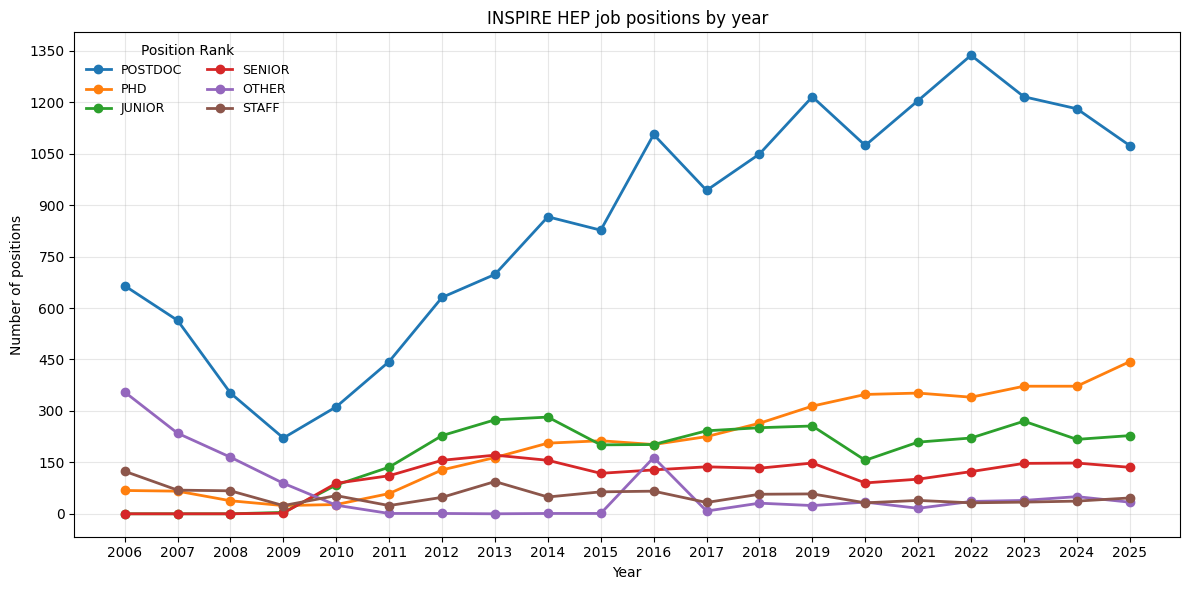

In [17]:
# import matplotlib.ticker as mticker

# import matplotlib.ticker as mticker

# years = pivot.index.astype(int).tolist()

# # plot using integer x values
# fig, ax = plt.subplots(figsize=(12, 6))
# for col in pivot.columns:
#     ax.plot(years, pivot[col].values, marker='o', linewidth=2, label=col)

# # integer-only ticks on both axes
# ax.set_xticks(years)  # tick at each year only
# ax.xaxis.set_major_formatter(mticker.StrMethodFormatter('{x:.0f}'))

# ax.yaxis.set_major_locator(mticker.MaxNLocator(integer=True))
# ax.yaxis.set_major_formatter(mticker.StrMethodFormatter('{x:.0f}'))

# ax.set_xlabel('Year'); ax.set_ylabel('Number of positions')
# ax.set_title('INSPIRE HEP job positions by year and rank')
# ax.grid(True, alpha=0.3); ax.legend(title='Rank', ncol=2, frameon=False, fontsize=9)

# plt.tight_layout(); plt.show()

import ast, pandas as pd, matplotlib.pyplot as plt, matplotlib.ticker as mticker

TOP_RANKS = 6  # set to None to plot all ranks


# 1) Parse deadline year
d = df.copy()

d["deadline_year"] = pd.to_datetime(d["deadline_date"], errors="coerce").dt.year
d = d.dropna(subset=["deadline_year"])
d["deadline_year"] = d["deadline_year"].astype(int)



# 2) Parse ranks → flat Series aligned to index
parse = lambda v: v if isinstance(v, list) else (ast.literal_eval(v) if isinstance(v, str) and v.strip().startswith('[') else [v])
r = (d["ranks"].dropna().map(parse).explode().astype(str).str.strip())
r = r[r.ne("")]

# 3) Year×rank counts (each rank on a posting counts once)
tmp = pd.DataFrame({"year": d.loc[r.index, "deadline_year"].values, "rank": r.values})
pivot = tmp.groupby(["year","rank"]).size().unstack(fill_value=0).sort_index()

# display(pivot)

num_cols  = pivot.select_dtypes('number').columns
for column in num_cols: pivot.loc[2025,column]  *= CORRECT_2025

# keep top ranks for readability
if TOP_RANKS:
    top = pivot.sum().sort_values(ascending=False).head(TOP_RANKS).index
    pivot = pivot[top]

# 4) Plot with integer-only axes
years = pivot.index.astype(int).tolist()
fig, ax = plt.subplots(figsize=(12, 6))
for col in pivot.columns:
    ax.plot(years, pivot[col].values, marker='o', linewidth=2, label=col)

ax.set_xticks(years)
ax.xaxis.set_major_formatter(mticker.StrMethodFormatter('{x:.0f}'))
ax.yaxis.set_major_locator(mticker.MaxNLocator(integer=True))
ax.yaxis.set_major_formatter(mticker.StrMethodFormatter('{x:.0f}'))

ax.set_xlabel('Year'); ax.set_ylabel('Number of positions')
ax.set_title('INSPIRE HEP job positions by year')
ax.grid(True, alpha=0.3); ax.legend(title='Position Rank', ncol=2, frameon=False, fontsize=9)

plt.tight_layout(); plt.show()

In [12]:
! pip install itables

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.4/2.4 MB 12.0 MB/s eta 0:00:0000:0100:01


In [13]:
# what is wrong with 2025?
df2015 = df[df.year==2015]
print(df2015.size)
display(df2015.head(30))

# save in HTML to study interactively:
from itables import to_html_datatable
html = to_html_datatable(df2015)
open("/kaggle/working/table.html","w",encoding="utf-8").write(html)
print("Saved /kaggle/working/table.html")

26760


,regions,external_job_identifier,legacy_creation_date,description,external_system_identifiers,institutions,arxiv_categories,urls,deadline_date,ranks,control_number,position,status,_id,_created,_updated,year,accelerator_experiments,legacy_version,deleted_records
8284,[North America],AJO-6124,2015-12-22,The High Energy/Nuclear Theory Group at the Un...,NaN,"[{'curated_relation': True, 'record': {'$ref':...","[astro-ph, gr-qc, hep-ph, hep-th, nucl-th]",[{'value': 'https://academicjobsonline.org/ajo...,2015-12-01,[POSTDOC],1410996,High Energy/Nuclear Theory,closed,1410996,2015-12-22T00:00:00+00:00,2019-08-09T13:20:47.508344+00:00,2015,NaN,20170216204009.0,NaN
8285,[North America],AJO-6854,2015-12-07,The Lawrence-Berkeley National Laboratory (LBN...,NaN,"[{'curated_relation': True, 'record': {'$ref':...","[physics.ins-det, cs]",[{'value': 'https://academicjobsonline.org/ajo...,2015-12-18,[POSTDOC],1408358,Compuer hardware for charged particle tracking,closed,1408358,2015-12-07T00:00:00+00:00,2019-08-09T13:19:42.136558+00:00,2015,NaN,20160128221103.0,NaN
8286,[North America],AJO-6216,2015-12-04,The Department of Physics at Lehigh University...,NaN,"[{'curated_relation': True, 'record': {'$ref':...",[hep-th],[{'value': 'https://academicjobsonline.org/ajo...,2015-12-15,[POSTDOC],1408138,Particle theory and/or gravity,closed,1408138,2015-12-04T00:00:00+00:00,2019-08-09T13:19:45.667791+00:00,2015,NaN,20160105194313.0,NaN
8287,[North America],NaN,2015-12-01,<p> The Physics Department at the University o...,NaN,"[{'curated_relation': True, 'record': {'$ref':...","[astro-ph, cond-mat, cs, gr-qc, hep-th, quant-ph]",[{'value': 'https://academicjobsonline.org/ajo...,2015-12-15,[POSTDOC],1407084,Theoretical Physics,closed,1407084,2015-12-01T00:00:00+00:00,2019-08-09T13:19:39.020049+00:00,2015,NaN,20190711204027.0,NaN
8288,[Europe],NaN,2015-12-01,<strong>ACCELERATOR<br> PHYSICS<br> DESY has o...,NaN,"[{'curated_relation': True, 'record': {'$ref':...","[hep-ph, physics.acc-ph]",[{'value': 'http://www.desy.de/about_desy/care...,2015-12-31,[POSTDOC],1407255,DESY-Fellowships (f/m) in Accelerator R&D - FE...,closed,1407255,2015-12-01T00:00:00+00:00,2019-08-09T13:19:42.768254+00:00,2015,NaN,20160105194312.0,NaN
8289,[Europe],NaN,2015-12-01,<strong>ACCELERATOR<br> PHYSICS<br> DESY has o...,NaN,"[{'curated_relation': True, 'record': {'$ref':...","[hep-ph, physics.acc-ph]",[{'value': 'http://www.desy.de/about_desy/care...,2015-12-31,[PHD],1407260,Accelerator R&D,closed,1407260,2015-12-01T00:00:00+00:00,2019-08-09T13:19:43.589112+00:00,2015,NaN,20160105194312.0,NaN
8290,[Europe],NaN,2015-12-01,&nbsp;&nbsp; &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nb...,NaN,"[{'curated_relation': True, 'record': {'$ref':...",[hep-ph],[{'value': 'https://univis.univie.ac.at/aussch...,2015-12-15,[POSTDOC],1407263,High-energy particle physics phenomenology,closed,1407263,2015-12-01T00:00:00+00:00,2019-08-09T13:19:43.859057+00:00,2015,NaN,20160303173817.0,NaN
8291,[Europe],NaN,2015-12-01,Applications are invited for an STFC-funded Re...,NaN,"[{'curated_relation': True, 'record': {'$ref':...",[hep-ph],NaN,2015-12-22,[POSTDOC],1407403,QCD Phenomenology,closed,1407403,2015-12-01T00:00:00+00:00,2019-08-09T13:19:35.011226+00:00,2015,NaN,20160112231330.0,NaN
8292,[North America],NaN,2015-11-30,Job Description Post-doctoral Research Associa...,NaN,"[{'curated_relation': True, 'record': {'$ref':...",[nucl-th],NaN,2015-12-31,[POSTDOC],1407075,Nuclear Theory,closed,1407075,2015-11-30T00:00:00+00:00,2019-08-09T13:19:37.086457+00:00,2015,NaN,20160105194312.0,NaN
8293,[Asia],NaN,2015-11-28,Tsinghua University invites applications for p...,NaN,"[{'curated_relation': False, 'value': 'Tsinghu...",[hep-ex],NaN,2015-12-10,[POSTDOC],1406811,Experimental High Energy Physics,closed,1406811,2015-11-28T00:00:00+00:00,2019-08-09T13:19:22.582109+00:00,2015,"[{'name': 'CERN-LHC-ATLAS', 'record': {'$ref':...",20160105194312.0,NaN


Saved /kaggle/working/table.html


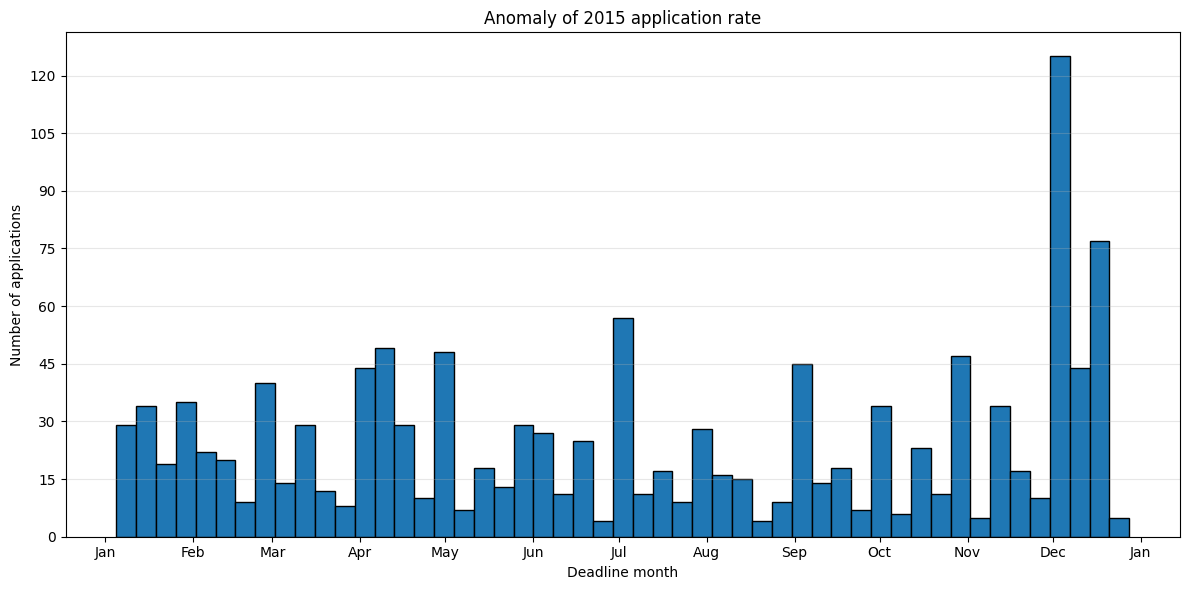

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import matplotlib.dates as mdates

d = df2015.copy()
d["deadline_dt"] = pd.to_datetime(d["deadline_date"], errors="coerce")
d = d.dropna(subset=["deadline_dt"])
d = d[d["deadline_dt"].dt.year == 2015]

# ----- bins: monthly (change to 'W-MON' for weekly) -----
BIN_FREQ = "W-MON"  # Month Start; use "W-MON" for weekly bins
# BIN_FREQ = "MS" 
start = pd.Timestamp("2015-01-01")
end   = pd.Timestamp("2016-01-01")
bins = pd.date_range(start, end, freq=BIN_FREQ)

# ----- plot -----
fig, ax = plt.subplots(figsize=(12, 6))
ax.hist(d["deadline_dt"], bins=bins, edgecolor="black")

# x-axis formatting (months)
ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter("%b"))

# integer-only y axis
ax.yaxis.set_major_locator(mticker.MaxNLocator(integer=True))
ax.yaxis.set_major_formatter(mticker.StrMethodFormatter('{x:.0f}'))

ax.set_title("Anomaly of 2015 application rate")
ax.set_xlabel("Deadline month")
ax.set_ylabel("Number of applications")
ax.grid(True, axis="y", alpha=0.3)
plt.tight_layout()
plt.show()

In [15]:
# Here we check unique arxiv_categories
import ast

# Parse ranks -> flat Series of strings
vals = (df["arxiv_categories"].dropna()
        .map(lambda x: x if isinstance(x, list) else (
             ast.literal_eval(x) if isinstance(x, str) and x.strip().startswith("[") else [x]))
        .explode().astype(str).str.strip()).loc[lambda s: s.ne("")]

uniques = sorted(vals.unique())
print("Unique:", uniques)

# (optional) counts
display(vals.value_counts())

Unique: ['astro-ph', 'cond-mat', 'cs', 'econ', 'eess', 'gr-qc', 'hep-ex', 'hep-lat', 'hep-ph', 'hep-th', 'math', 'math-ph', 'nlin', 'nucl-ex', 'nucl-th', 'physics', 'physics.acc-ph', 'physics.atom-ph', 'physics.ins-det', 'q-bio', 'q-fin', 'quant-ph', 'stat']


arxiv_categories
hep-ex             10458
hep-ph              7981
astro-ph            7702
hep-th              6887
physics             3656
gr-qc               3481
nucl-ex             3213
nucl-th             2409
hep-lat             1974
physics.ins-det     1939
math-ph             1635
physics.acc-ph      1597
cond-mat            1570
quant-ph            1494
cs                  1244
math                1092
stat                 248
q-bio                115
nlin                 103
eess                  59
econ                  49
q-fin                 40
physics.atom-ph        2
Name: count, dtype: int64

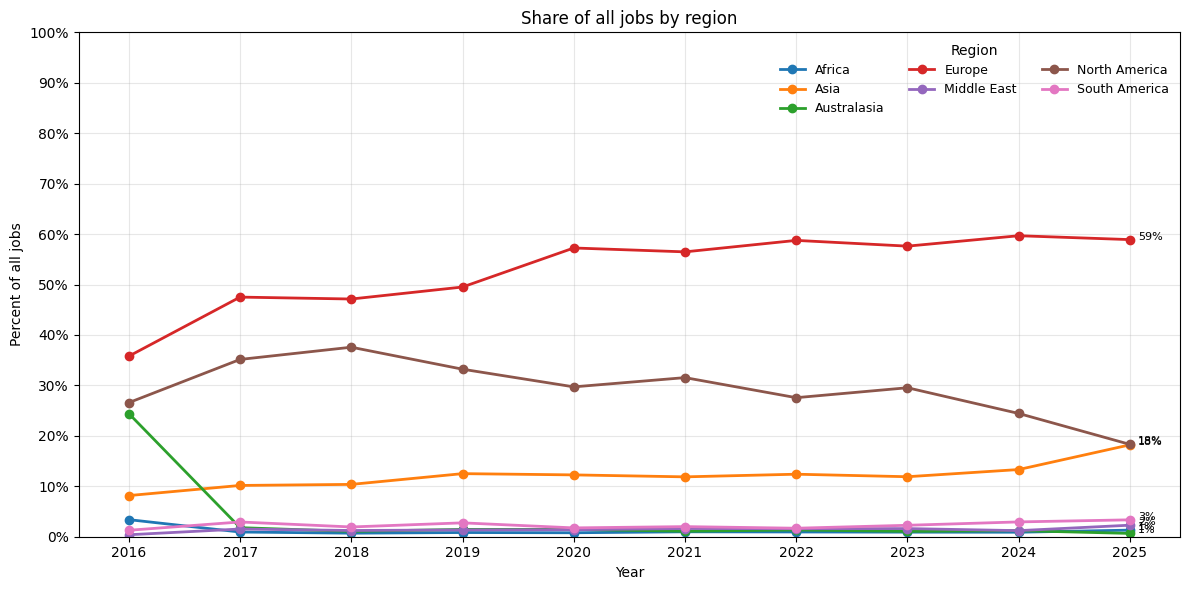

In [16]:
import math

# % of all jobs per region by DEADLINE year (multi-line plot)

import ast, pandas as pd, matplotlib.pyplot as plt, matplotlib.ticker as mticker

# --- config ---
REGIONS = ['Africa','Asia','Australasia','Europe','Middle East','North America','South America']
LAST_N_YEARS = 10  # plot last N years present; set to None to show all

d = df.copy()

d["deadline_dt"] = pd.to_datetime(d["deadline_date"], errors="coerce")
d = d.dropna(subset=["deadline_dt"])
d["year"] = d["deadline_dt"].dt.year.astype(int)

# pick an ID for de-duplication
id_col = "_id" if "_id" in d.columns else ("control_number" if "control_number" in d.columns else None)
if id_col is None:
    d = d.reset_index().rename(columns={"index": "_row_id"})
    id_col = "_row_id"

# parse regions -> list
def to_list(x):
    if x is None or (isinstance(x, float) and pd.isna(x)): return []
    if isinstance(x, list): return x
    if isinstance(x, str) and x.strip().startswith("["):
        try:
            v = ast.literal_eval(x)
            return v if isinstance(v, list) else [v]
        except Exception:
            pass
    return [x]

norm = {k.upper(): k for k in REGIONS}
def norm_region(v):
    s = str(v).strip().replace("-", " ").upper()
    return norm.get(s)

r = d["regions"].apply(to_list).explode().dropna().map(norm_region).dropna()
ex = pd.DataFrame({
    id_col: d.loc[r.index, id_col].values,
    "year":  d.loc[r.index, "year"].values,
    "region": r.values
}).drop_duplicates([id_col, "year", "region"])  # one posting per (year, region)

# totals per year (unique postings)
totals = d.drop_duplicates(subset=[id_col]).groupby("year")[id_col].nunique()

# counts per (year, region) => percentages of yearly total
counts = ex.groupby(["year","region"])[id_col].nunique().unstack(fill_value=0)
counts = counts.reindex(columns=REGIONS, fill_value=0).reindex(totals.index, fill_value=0)
pct = (counts.div(totals, axis=0) * 100).sort_index()

# limit to last N years (optional)
if LAST_N_YEARS:
    pct = pct.iloc[-LAST_N_YEARS:]

# ---- plot ----
years = pct.index.astype(int).tolist()
fig, ax = plt.subplots(figsize=(12, 6))
for reg in REGIONS:
    if reg in pct.columns:
        ax.plot(years, pct[reg].values, marker='o', linewidth=2, label=reg)

# integer years on X; percentage on Y
ax.set_xticks(years)
ax.xaxis.set_major_formatter(mticker.StrMethodFormatter('{x:.0f}'))
ax.set_ylim(0, 100)
ax.yaxis.set_major_locator(mticker.MultipleLocator(10))
ax.yaxis.set_major_formatter(mticker.StrMethodFormatter('{x:.0f}%'))

ax.set_title('Share of all jobs by region')
ax.set_xlabel('Year'); ax.set_ylabel('Percent of all jobs')
ax.grid(True, alpha=0.3)
ax.legend(title='Region', ncol=3, frameon=False, fontsize=9)

# annotate last point for each line
for reg in REGIONS:
    if reg in pct.columns and not pct[reg].empty:
        yval = pct[reg].iloc[-1]
        ax.annotate(f"{yval:.0f}%", (years[-1], yval), xytext=(6,0),
                    textcoords='offset points', fontsize=8)

plt.tight_layout(); plt.show()


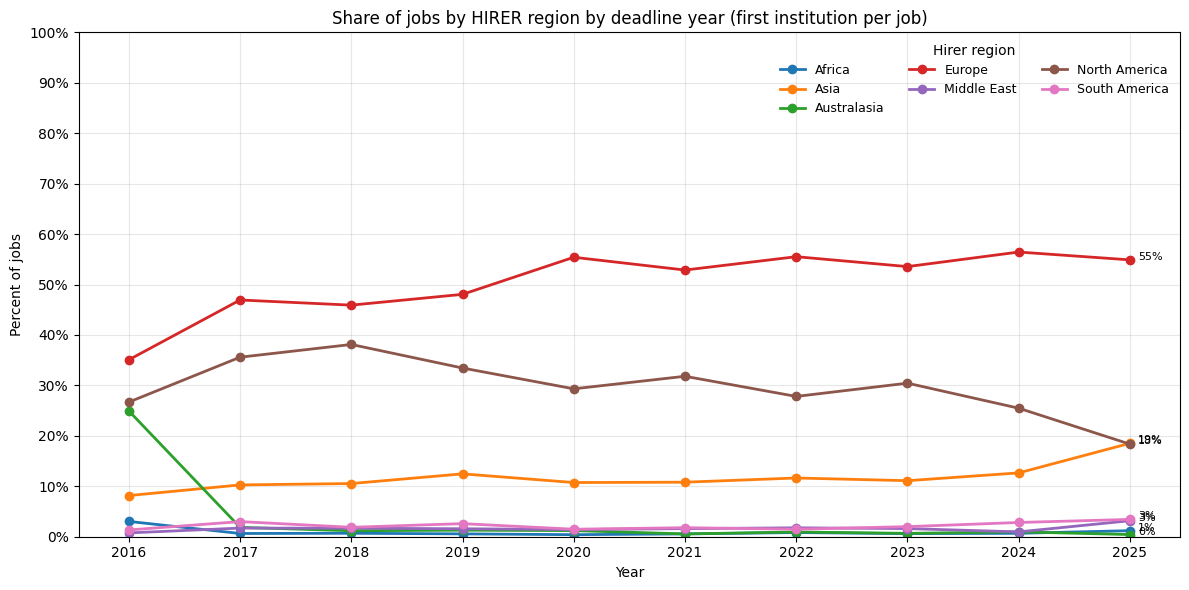

In [30]:
# % of jobs by HIRER region (from institutions), grouped by DEADLINE year

import re, math, ast, json, time
import pandas as pd
import numpy as np
import requests
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker

# ---------------- Config ----------------
REGIONS = ['Africa','Asia','Australasia','Europe','Middle East','North America','South America']
MULTI_ASSIGN = 'first'  # 'first' = use first institution per job; 'all' = count all institutions (lines may sum >100%)
BATCH = 200             # API batch size for institutions
API_BASE = "https://inspirehep.net/api/institutions"
HDRS = {"User-Agent": "kaggle-inspire-hirer-region/1.0"}

# --------- Helpers: parse institutions from jobs df ---------
def extract_institutions(inst_list):
    """
    Returns a list of (name, control_number or None) from a jobs 'institutions' cell.
    Works if each item is a dict with 'value' and optional 'record' {'$ref': '.../institutions/12345'}.
    """
    out = []
    if not isinstance(inst_list, list):
        return out
    for it in inst_list:
        name, cn = None, None
        if isinstance(it, dict):
            name = it.get("value")
            rec = it.get("record") or {}
            if isinstance(rec, dict):
                if "control_number" in rec:
                    cn = rec.get("control_number")
                ref = rec.get("$ref") or rec.get("record") or ""
                if ref and cn is None:
                    m = re.search(r"/institutions/(\d+)$", str(ref))
                    if m:
                        cn = int(m.group(1))
        elif isinstance(it, str):
            name = it
        if name:
            out.append((str(name), cn))
    return out

# --------- Download institution countries in batches ---------
def fetch_institutions_countries(control_numbers):
    """
    Returns DataFrame with columns: inst_cn, inst_country (string or None).
    """
    control_numbers = sorted(set(int(x) for x in control_numbers if pd.notna(x)))
    rows = []
    for i in range(0, len(control_numbers), BATCH):
        batch = control_numbers[i:i+BATCH]
        q = " OR ".join(str(x) for x in batch)
        params = {
            "size": "1000",
            "q": f"control_number:({q})",
            "fields": "control_number,addresses"
        }
        r = requests.get(API_BASE, params=params, headers=HDRS, timeout=60)
        r.raise_for_status()
        data = r.json()
        for hit in data.get("hits", {}).get("hits", []):
            md = hit.get("metadata", {})
            cn = md.get("control_number")
            # addresses is a list; take the first non-empty country
            country = None
            for addr in (md.get("addresses") or []):
                c = addr.get("country")
                if c:
                    country = c
                    break
            rows.append({"inst_cn": cn, "inst_country": country})
        time.sleep(0.25)  # be polite
    return pd.DataFrame(rows).drop_duplicates("inst_cn")

# --------- Country -> Region mapping (7 buckets) ----------
MIDDLE_EAST = {
    "Bahrain","Cyprus","Egypt","Iran","Iraq","Israel","Jordan","Kuwait","Lebanon",
    "Oman","Palestine","Qatar","Saudi Arabia","Syria","Turkey","United Arab Emirates","Yemen"
}
AUSTRALASIA = {
    "Australia","New Zealand","Fiji","Papua New Guinea","Samoa","Tonga","Vanuatu","Solomon Islands",
    "Micronesia","Kiribati","Nauru","Palau","Tuvalu","Marshall Islands"
}
NORTH_AMERICA = {"United States","Canada","Mexico"}
SOUTH_AMERICA = {"Argentina","Bolivia","Brazil","Chile","Colombia","Ecuador","Guyana","Paraguay","Peru","Suriname","Uruguay","Venezuela"}
EUROPE = {
    "Albania","Andorra","Armenia","Austria","Azerbaijan","Belarus","Belgium","Bosnia and Herzegovina",
    "Bulgaria","Croatia","Czech Republic","Denmark","Estonia","Finland","France","Georgia","Germany",
    "Greece","Hungary","Iceland","Ireland","Italy","Kazakhstan","Kosovo","Latvia","Liechtenstein",
    "Lithuania","Luxembourg","Malta","Moldova","Monaco","Montenegro","Netherlands","North Macedonia",
    "Norway","Poland","Portugal","Romania","Russia","San Marino","Serbia","Slovakia","Slovenia","Spain",
    "Sweden","Switzerland","Turkey","Ukraine","United Kingdom","Vatican City"
}
AFRICA = {
    "Algeria","Angola","Benin","Botswana","Burkina Faso","Burundi","Cabo Verde","Cameroon","Central African Republic",
    "Chad","Comoros","Congo","Democratic Republic of the Congo","Djibouti","Egypt","Equatorial Guinea","Eritrea",
    "Eswatini","Ethiopia","Gabon","Gambia","Ghana","Guinea","Guinea-Bissau","Ivory Coast","Kenya","Lesotho","Liberia",
    "Libya","Madagascar","Malawi","Mali","Mauritania","Mauritius","Morocco","Mozambique","Namibia","Niger","Nigeria",
    "Rwanda","Sao Tome and Principe","Senegal","Seychelles","Sierra Leone","Somalia","South Africa","South Sudan",
    "Sudan","Tanzania","Togo","Tunisia","Uganda","Zambia","Zimbabwe"
}
ASIA = {
    "Afghanistan","Bangladesh","Bhutan","Brunei","Cambodia","China","Hong Kong","India","Indonesia","Japan",
    "Laos","Malaysia","Mongolia","Myanmar","Nepal","North Korea","Pakistan","Philippines","Singapore",
    "South Korea","Sri Lanka","Taiwan","Thailand","Vietnam"
}

def country_to_region(country):
    if not country or not isinstance(country, str):
        return None
    c = country.strip()
    if c in MIDDLE_EAST:   return "Middle East"
    if c in AUSTRALASIA:   return "Australasia"
    if c in EUROPE:        return "Europe"
    if c in NORTH_AMERICA: return "North America"
    if c in SOUTH_AMERICA: return "South America"
    if c in AFRICA:        return "Africa"
    if c in ASIA:          return "Asia"
    # fallback for common variants
    if c in {"UK","U.K.","England","Scotland","Wales","Northern Ireland"}: return "Europe"
    if c in {"USA","U.S.A.","U.S.","United States of America"}: return "North America"
    return None

# --------- Build per-job hirer region ---------
d = df.copy()

# deadline year
d["deadline_dt"] = pd.to_datetime(d["deadline_date"], errors="coerce")
d = d.dropna(subset=["deadline_dt"]).copy()
d["year"] = d["deadline_dt"].dt.year.astype(int)

# Pick a stable job id
id_col = "_id" if "_id" in d.columns else ("control_number" if "control_number" in d.columns else None)
if id_col is None:
    d = d.reset_index().rename(columns={"index":"_row_id"})
    id_col = "_row_id"

# extract institution tuples per job
inst_tuples = d["institutions"].apply(extract_institutions)

# unique control_numbers to fetch
inst_cns = []
for lst in inst_tuples:
    for _, cn in lst:
        if cn is not None:
            inst_cns.append(cn)

inst_map_df = fetch_institutions_countries(inst_cns) if inst_cns else pd.DataFrame(columns=["inst_cn","inst_country"])
inst_cn_to_country = dict(zip(inst_map_df["inst_cn"], inst_map_df["inst_country"]))

# per job, choose hirer country/region
def job_hirer_region(tuples_list):
    if not tuples_list:
        return None if MULTI_ASSIGN == 'first' else []
    def tuple_to_country(tp):
        name, cn = tp
        if cn in inst_cn_to_country:
            return inst_cn_to_country[cn]
        return None  # unknown
    if MULTI_ASSIGN == 'first':
        # first institution only
        country = tuple_to_country(tuples_list[0])
        return country_to_region(country) if country else None
    else:
        # all institutions (multi-assign)
        regions = []
        for tp in tuples_list:
            country = tuple_to_country(tp)
            reg = country_to_region(country) if country else None
            if reg: regions.append(reg)
        return sorted(set(regions))

if MULTI_ASSIGN == 'first':
    d["hirer_region"] = inst_tuples.apply(job_hirer_region)
    # keep only jobs we could map
    dd = d.dropna(subset=["hirer_region"]).copy()
    # totals per year
    totals = dd.drop_duplicates(subset=[id_col]).groupby("year")[id_col].nunique()
    # counts by year x hirer_region
    counts = (dd.drop_duplicates(subset=[id_col, "hirer_region"])
                .groupby(["year","hirer_region"])[id_col].nunique()
                .unstack(fill_value=0)
                .reindex(columns=REGIONS, fill_value=0))
    pct = (counts.div(totals, axis=0) * 100).sort_index()
else:
    # explode multi-assign list
    d["hirer_region_list"] = inst_tuples.apply(job_hirer_region)
    ex = d.explode("hirer_region_list").dropna(subset=["hirer_region_list"]).rename(columns={"hirer_region_list":"hirer_region"})
    # totals per year (unique jobs)
    totals = ex.drop_duplicates(subset=[id_col]).groupby("year")[id_col].nunique()
    counts = (ex.drop_duplicates(subset=[id_col,"hirer_region"])
                .groupby(["year","hirer_region"])[id_col].nunique()
                .unstack(fill_value=0)
                .reindex(columns=REGIONS, fill_value=0))
    pct = (counts.div(totals, axis=0) * 100).sort_index()

# (optional) focus last 10 years present
pct = pct.iloc[-10:]

# ------------- Plot -------------
years = pct.index.astype(int).tolist()
fig, ax = plt.subplots(figsize=(12, 6))
for reg in REGIONS:
    if reg in pct.columns:
        ax.plot(years, pct[reg].values, marker='o', linewidth=2, label=reg)

ax.set_xticks(years)
ax.xaxis.set_major_formatter(mticker.StrMethodFormatter('{x:.0f}'))
ax.set_ylim(0, 100)
ax.yaxis.set_major_locator(mticker.MultipleLocator(10))
ax.yaxis.set_major_formatter(mticker.StrMethodFormatter('{x:.0f}%'))

title_suffix = " (first institution per job)" if MULTI_ASSIGN=='first' else " (counting all listed institutions)"
ax.set_title('Share of jobs by HIRER region by deadline year' + title_suffix)
ax.set_xlabel('Year'); ax.set_ylabel('Percent of jobs')
ax.grid(True, alpha=0.3)
ax.legend(title='Hirer region', ncol=3, frameon=False, fontsize=9)

# annotate last point
for reg in REGIONS:
    if reg in pct.columns and not pct[reg].empty:
        yval = pct[reg].iloc[-1]
        ax.annotate(f"{yval:.0f}%", (years[-1], yval), xytext=(6,0), textcoords='offset points', fontsize=8)

plt.tight_layout(); plt.show()
